## REQUERIMENTS BEFORE EXECUTING THIS NOTEBOOK

In [479]:
#ASSIGN YOUR WORKING DIRECTORY
working_directory  <-  'C:\\Users\\Toni\\Desktop\\TFM'

In [480]:
#Packages and libraries needed
install.packages("FitAR")
library(FitAR)
library(tidyverse)
library(purrr)
install.packages('roll')
library(roll)
library(scales)
install.packages('pracma')
library(pracma)
library(TTR)
library(stringr)
install.packages('pdftools')
library(pdftools)
library(dslabs)
library(lubridate)
install.packages('WDI')
library(WDI)
library(seasonal)
library(ggplot2)
install.packages('fpp2')
library(fpp2)
install.packages('forecast')
library(forecast)
install.packages('fma')
library(fma)
install.packages('expsmooth')
library(expsmooth)
install.packages('seasonal')
library(seasonal)
library(tseries)

Installing package into 'C:/Users/Toni/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  no fue posible abrir la URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"Warning message:
"package 'FitAR' is in use and will not be installed"Installing package into 'C:/Users/Toni/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  no fue posible abrir la URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"Warning message:
"package 'roll' is in use and will not be installed"Installing package into 'C:/Users/Toni/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  no fue posible abrir la URL '

# Analysis of Suicide Time Series

## 1. Reading the Data

In [481]:
wkdir_and_path <- cbind(working_directory,'Data\\Monthly_suicide_Spain_1998-2017.csv')
suicide_filepath <- str_c(wkdir_and_path, collapse = "\\")
suicide_1998_2017 <- read.csv(suicide_filepath)
suicide_1998_2017

Date,N_of_suicides
1998-01-31,218
1998-02-28,238
1998-03-31,281
1998-04-30,195
1998-05-31,267
1998-06-30,222
1998-07-31,226
1998-08-31,207
1998-09-30,193
1998-10-31,176


Seems that our date index is not very useful in R code. We need a 'ts' object to use many of the best R resources for time series. The function 'ts' automatically turns our list of values into a time series if you give it start date and frequency.

## 2. Creating and exploring the Time Series

In [482]:
suicide_1998_2017 <- ts (suicide_1998_2017$N_of_suicides, frequency = 12, start = c(1998,1))
class(suicide_1998_2017)

[1] "ts"

In [483]:
#Here we have the start of our time series
start(suicide_1998_2017)

[1] 1998    1

In [484]:
#And the end
end(suicide_1998_2017)

[1] 2017   12

In [485]:
#The cycle of this time series is 12months in a year
frequency(suicide_1998_2017)

[1] 12

In [486]:
cycle(suicide_1998_2017)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1998   1   2   3   4   5   6   7   8   9  10  11  12
1999   1   2   3   4   5   6   7   8   9  10  11  12
2000   1   2   3   4   5   6   7   8   9  10  11  12
2001   1   2   3   4   5   6   7   8   9  10  11  12
2002   1   2   3   4   5   6   7   8   9  10  11  12
2003   1   2   3   4   5   6   7   8   9  10  11  12
2004   1   2   3   4   5   6   7   8   9  10  11  12
2005   1   2   3   4   5   6   7   8   9  10  11  12
2006   1   2   3   4   5   6   7   8   9  10  11  12
2007   1   2   3   4   5   6   7   8   9  10  11  12
2008   1   2   3   4   5   6   7   8   9  10  11  12
2009   1   2   3   4   5   6   7   8   9  10  11  12
2010   1   2   3   4   5   6   7   8   9  10  11  12
2011   1   2   3   4   5   6   7   8   9  10  11  12
2012   1   2   3   4   5   6   7   8   9  10  11  12
2013   1   2   3   4   5   6   7   8   9  10  11  12
2014   1   2   3   4   5   6   7   8   9  10  11  12
2015   1   2   3   4   5   6   7   8   9  10  

In [487]:
#Some descriptive statistics
summary(suicide_1998_2017)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  135.0   213.5   267.5   257.7   301.0   371.0 

The first basic plot that we are going to use is a line graph with the values of the series in the ordinate and the temporal instants on the abscissa axis. Constructing this graph can be very useful to observe some characteristics of our time series.

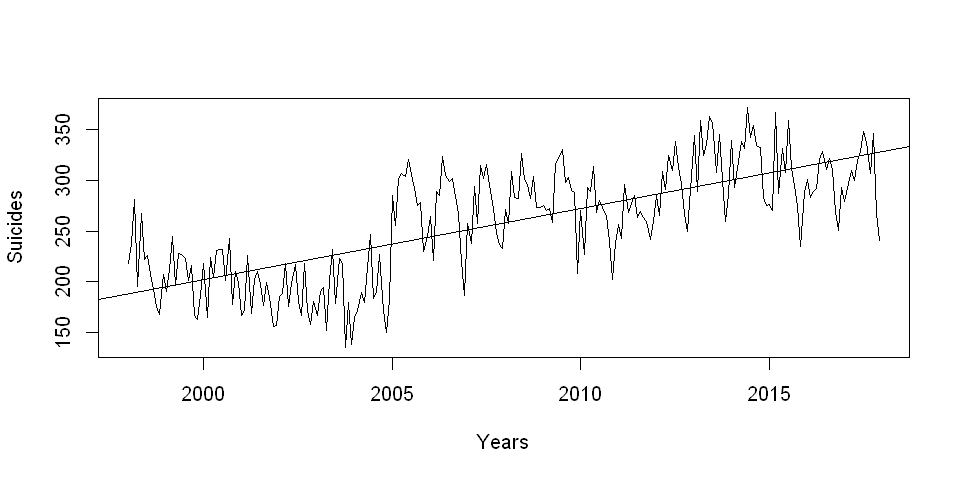

In [488]:
#The number of suicides in Spain
plot(suicide_1998_2017, xlab = 'Years', ylab = 'Suicides')

#this will fit in a line
abline(reg=lm(suicide_1998_2017~time(suicide_1998_2017)))

Based on what we see in the representation, it seems that the mean, the variance and the covariance are not constant over time. This makes us think that we are facing a **non-stationary series**, although this is something that we will analyze in more detail later.

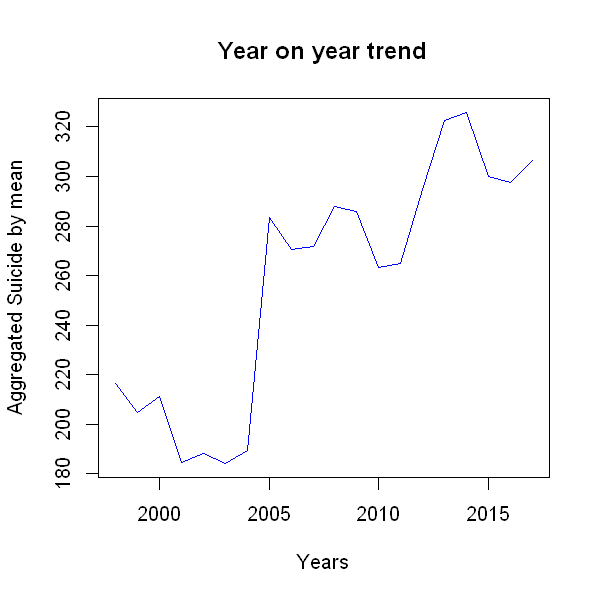

In [489]:
#In this plot we are going to aggregate the cycles and display a year on year trend
options(repr.plot.width=5, repr.plot.height=5)
plot(aggregate(suicide_1998_2017,FUN=mean), xlab = "Years", ylab = "Aggregated Suicide by mean", main = 'Year on year trend', col = 'blue')

The year on year trend clearly shows that the **number of suicides have been increasing since 2003-2004.**

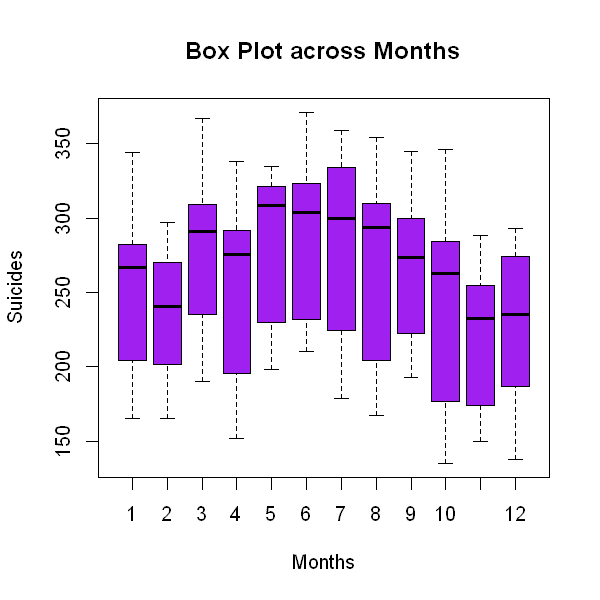

In [490]:
#Box plot across months will give us a sense on seasonal effect
options(repr.plot.width=5, repr.plot.height=5)
boxplot(suicide_1998_2017~cycle(suicide_1998_2017), xlab = 'Months', ylab = 'Suicides', main = 'Box Plot across Months',col = 'purple')

The mean value of suicides in **May and June is higher than rest of the months, but July has more variance and reachs higher values**.

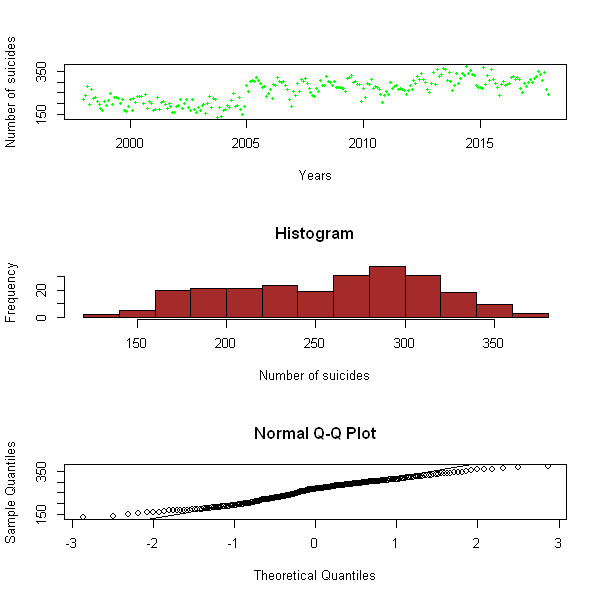

In [491]:
date = make_date(year = 1998, month = 1)
Date_range = seq(from = date, by = 'month', length.out = length(suicide_1998_2017))

par(mfrow=c(3,1)) 

#Scatter plot
plot(suicide_1998_2017, x = Date_range, xlab = 'Years', ylab = 'Number of suicides', pch=20, cex=0.7, col = 'green')

#histogram
hist (suicide_1998_2017, xlab = 'Number of suicides', main = 'Histogram', col = 'brown')

#Q-Q plot
qqnorm(suicide_1998_2017)
qqline(suicide_1998_2017)

In [492]:
ks.test(suicide_1998_2017, "pnorm", 257.725, 55.3225)

Warning message in ks.test(suicide_1998_2017, "pnorm", 257.725, 55.3225):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  suicide_1998_2017
D = 0.083239, p-value = 0.07189
alternative hypothesis: two-sided


The scatter plot and the histogram show us that it seems that in our distribution there are not very anomalous values but seems that there is a pretty big amount of dispersion.

The graphs and the Kolmogorov-Smirnov test show us that our series is close to a normal distribution.

## 3. Time Series Components Analysis

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

Also the decomposition methods can help us in forecasting.

*Let's start to analyze each of its components with a little more detail, but first we are going to split our time series in a train and a test sets.*

In [493]:
suicide_series_test  <- tail(suicide_1998_2017,48)
suicide_series_train  <- head(suicide_1998_2017, 192)

### 3.1. Decomposition methods

#### 3.1.1. Moving Mean

We present the methodology of moving averages because it's the first step in the classical decomposition and allows us to observe **the trend** of our time series represented in a smoothed way. It can be a good method to extract information in time series where there are no fluctuations due to trend or seasonality.

It is possible to apply a moving mean to a moving mean. One reason for doing this is to make an even-order moving average symmetric. It's recommended to use a 2x12 Moving averages to estimate the trend-cycle of monthly data:

Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 12 rows containing missing values (geom_path)."

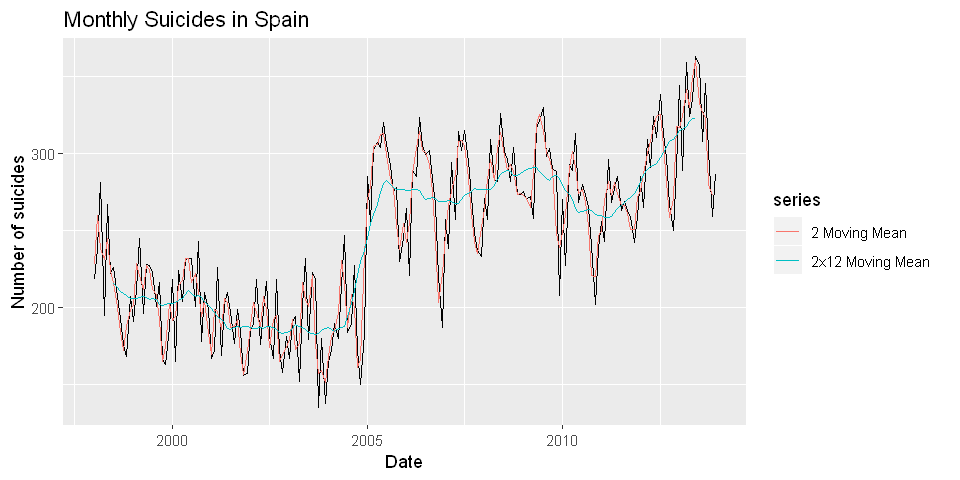

In [494]:
options(repr.plot.width=8, repr.plot.height=4)

#Applying Moving Mean
autoplot(suicide_series_train) +
    autolayer(ma(suicide_series_train, order=2, centre=FALSE), series='2 Moving Mean')+
    autolayer(ma(suicide_series_train,12, centre = TRUE), series='2x12 Moving Mean') +
    xlab('Date') + ylab('Number of suicides') +
    ggtitle('Monthly Suicides in Spain') +
    guides(colour=guide_legend(title='series'))

The moving mean helps us to reduce the noise or short-term volatility in the movements of the data and in this way allows us to better evaluate the quality and direction of a trend.

We can see that the estimated trend component shows an **increase from approximately 200 or less in 2004 to approximately 300 at the end of 2005, followed by a more or less constant increase from then until 2017.**

Seasonal adjustments are a statistical procedure to eliminate seasonal effects or what is the same, eliminate the influence of seasonal patterns in the data. These seasonal effects induce changes or variations due to the seasonality, causing a distortion of their true movement. 

There are many methods to struggle with seasonality. But first we have to be sure that there is seasonality in our time series.

#### 3.1.2. Classic Decomposition

We are going to use decompose function to see the components of our time series in a classic decomposition method, just to have a first look:

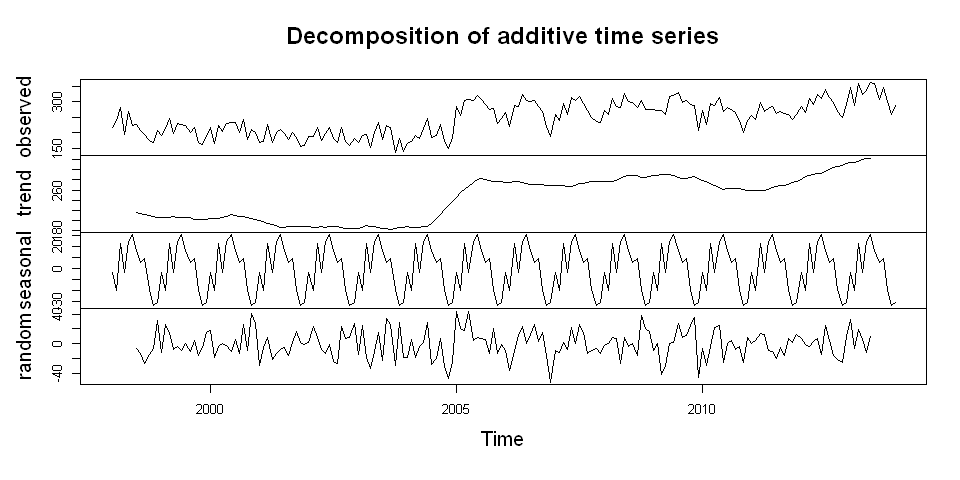

In [495]:
suicide_series_components  <- decompose(suicide_series_train)
plot(suicide_series_components)

The plot above shows the original time series (top), the estimated trend component (second from top), the estimated seasonal component (third from top), and the estimated irregular component (bottom). 

If we take a look at the suicide time series it seems that we have to deal with a trend and a seasonal component. Let's confirm this by plotting the autocorrelation function of our time series:

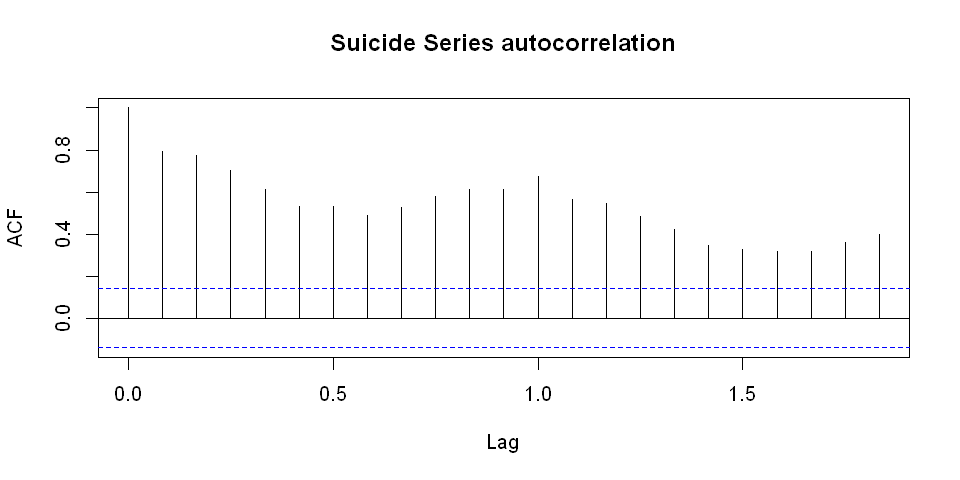

In [496]:
acf(suicide_series_train, main = 'Suicide Series autocorrelation')

As we see, clearly, **we have a seasonal component**.

Classical decomposition methods assume that the seasonal component repeats from year to year and we think that it might not be our case. A more sophisticated implementation is stl decomposition.

#### 3.1.3. STL decomposition

Maybe the most robust, versatile and popular method according to many sources. 
To determine the trend component this method uses a type of smoothing called loess that
makes a linear regression in a small dot window to decompose a time series into seasonal, trend and irregular components.

We are going to use mstl function which provides a convenient automated stl.

In [497]:
STL_suicide_components <- mstl(suicide_series_train)

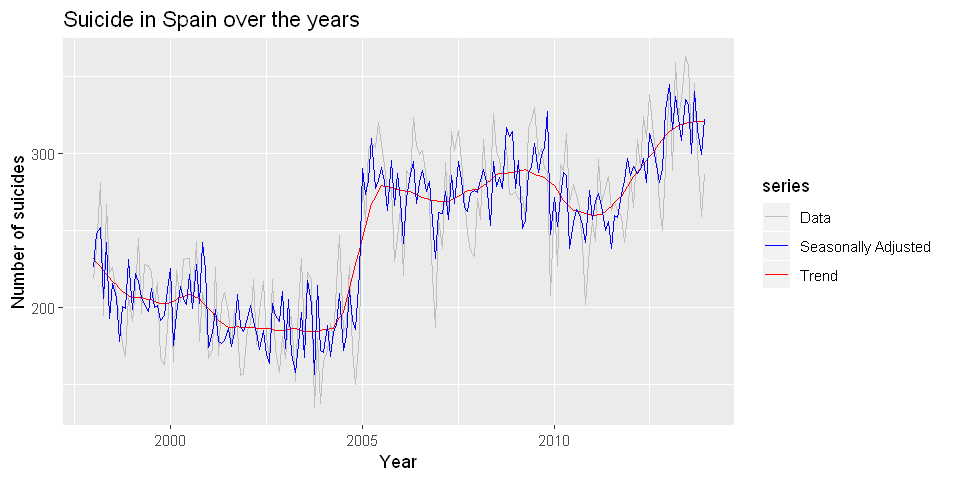

In [498]:
options(repr.plot.width=8, repr.plot.height=4)
autoplot(suicide_series_train, series="Data") +
    autolayer(trendcycle(STL_suicide_components), series="Trend") +
    autolayer(seasadj(STL_suicide_components), series="Seasonally Adjusted") +
    xlab("Year") + ylab("Number of suicides") +
    ggtitle("Suicide in Spain over the years") +
    scale_colour_manual(values=c("gray","blue","red"),
             breaks=c("Data","Seasonally Adjusted","Trend"))

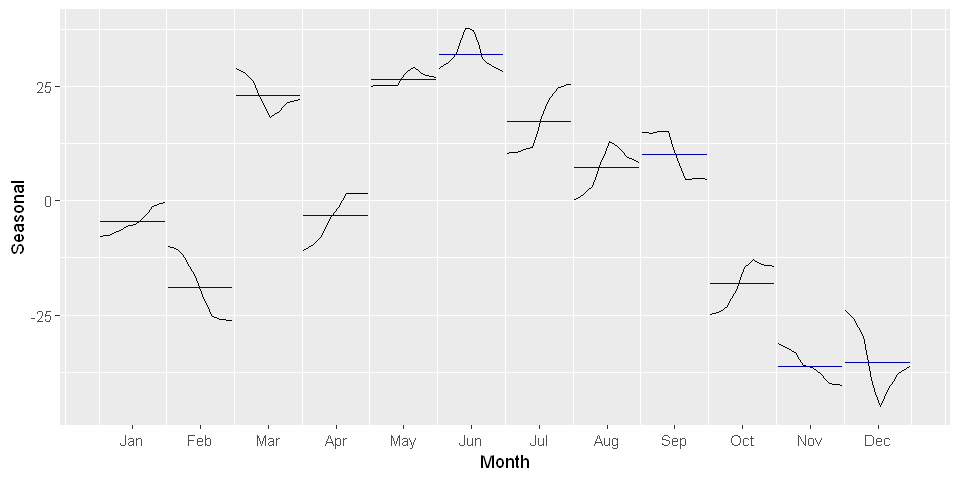

In [499]:
options(repr.plot.width=8, repr.plot.height=4)
STL_suicide_components %>% seasonal() %>% ggsubseriesplot() + ylab("Seasonal")

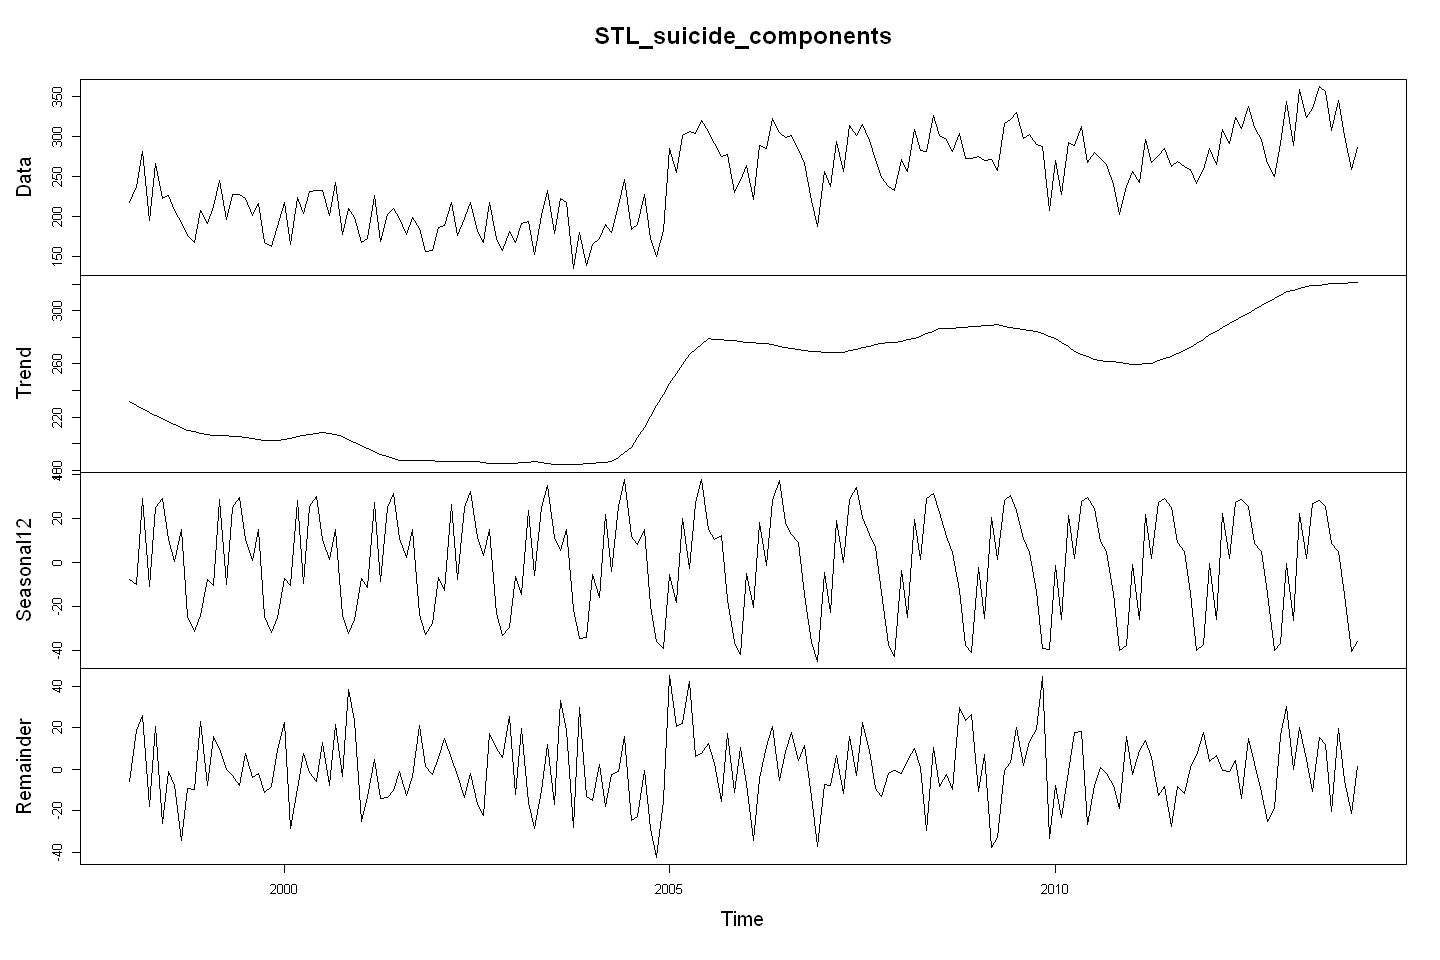

In [500]:
options(repr.plot.width=12, repr.plot.height=8)

plot(STL_suicide_components)

Here we can see a more smothed trend. But the most interesting thing that we can observe is that the seasonality component varies with time. Let's take a look at the values:

In [501]:
seasonal(STL_suicide_components) #get the values of the seasonal component

              Jan          Feb          Mar          Apr          May
1998  -7.88926475  -9.94426966  28.82186869 -10.79972087  25.01057681
1999  -7.69584823 -10.29689734  28.36713239 -10.28173861  25.09598386
2000  -7.49621885 -10.64111991  27.92299344  -9.75149649  25.19531327
2001  -7.12982690 -11.59745636  27.00517152  -8.80385537  25.13139185
2002  -6.79321736 -12.57380165  26.07711433  -7.85919664  25.07174093
2003  -6.27595347 -14.41642725  23.78404966  -5.99746784  25.06018513
2004  -5.68876114 -16.17620274  21.58675673  -4.03630604  25.15172358
2005  -5.38602293 -18.33243833  19.91200246  -2.63768074  26.67688077
2006  -5.25433580 -20.65707077  18.07150554  -1.39279550  28.06030050
2007  -4.49294045 -22.90335318  18.82189019   0.07476307  28.56957715
2008  -3.66488115 -25.12706881  19.55074444   1.48628778  28.98831645
2009  -2.51941857 -25.52351420  20.47960443   1.50133316  28.24598348
2010  -1.33126536 -25.86882381  21.46804536   1.58202873  27.57536998
2011  -1.01034437 -2

The largest seasonal factor was for June until 2010, after 2010 it changes and July turns into the largest seasonal factor. The lowest is always for November.

However, Loess decomposition is intended to smooth the series by applying averages to the data so that it collapses into components and that is interesting for the analysis of the data. But this methodology is not intended to do a formal test for the presence of seasonality.

The seasonal component might not be relevant to explain the dynamics of the series. In order to see that, we can compare the variance of each component with respect to the variance of the original series.

In [502]:
apply(STL_suicide_components,2, var) / var(suicide_series_train)

Data      Trend Seasonal12  Remainder 
 1.0000000  0.6898974  0.1861296  0.1022629

*We can see that it is the trend what explains most of the variance in the data.*

In [503]:
seasadj(STL_suicide_components)

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1998 225.8893 247.9443 252.1781 205.7997 241.9894 193.0872 215.6275 206.7462
1999 198.6958 222.2969 216.6329 206.2817 202.9040 197.4952 212.5396 200.2066
2000 225.4962 175.6411 196.0770 213.7515 205.8047 201.8892 221.4376 199.6561
2001 174.1298 183.5975 198.9948 177.8039 176.8686 178.8776 186.1637 174.8214
2002 192.7932 201.5738 191.9229 183.8592 172.9283 184.8612 169.8843 163.9892
2003 173.2760 205.4164 170.2160 157.9975 175.9398 197.1250 167.6839 217.4790
2004 170.6888 188.1762 168.4132 184.0363 188.8483 209.2890 172.3871 181.8824
2005 290.3860 273.3324 282.0880 309.6377 277.3231 282.4480 291.0836 281.4732
2006 269.2543 241.6571 270.9285 286.3928 294.9397 267.7253 280.8752 289.1222
2007 261.4929 260.9034 275.1781 256.9252 285.4304 267.7664 294.5659 282.5328
2008 274.6649 282.1271 289.4493 281.5137 253.0117 294.9213 278.3938 284.0901
2009 277.5194 295.5235 251.5204 256.4987 287.7540 290.7386 306.4131 287.2951

Seasadj function returns seasonally adjusted data constructed by removing the seasonal component. The seasonally adjusted time series now just contains the trend and the irregular component.

##### *Forecasting with Decomposition*

While decomposition is primarily useful for studying time series data, and exploring historical changes over time, it can also be used in forecasting.

We will use stlf function which decompose the time series using STL, forecast the seasonally adjusted series with arima, and return the reseasonalised forecasts.

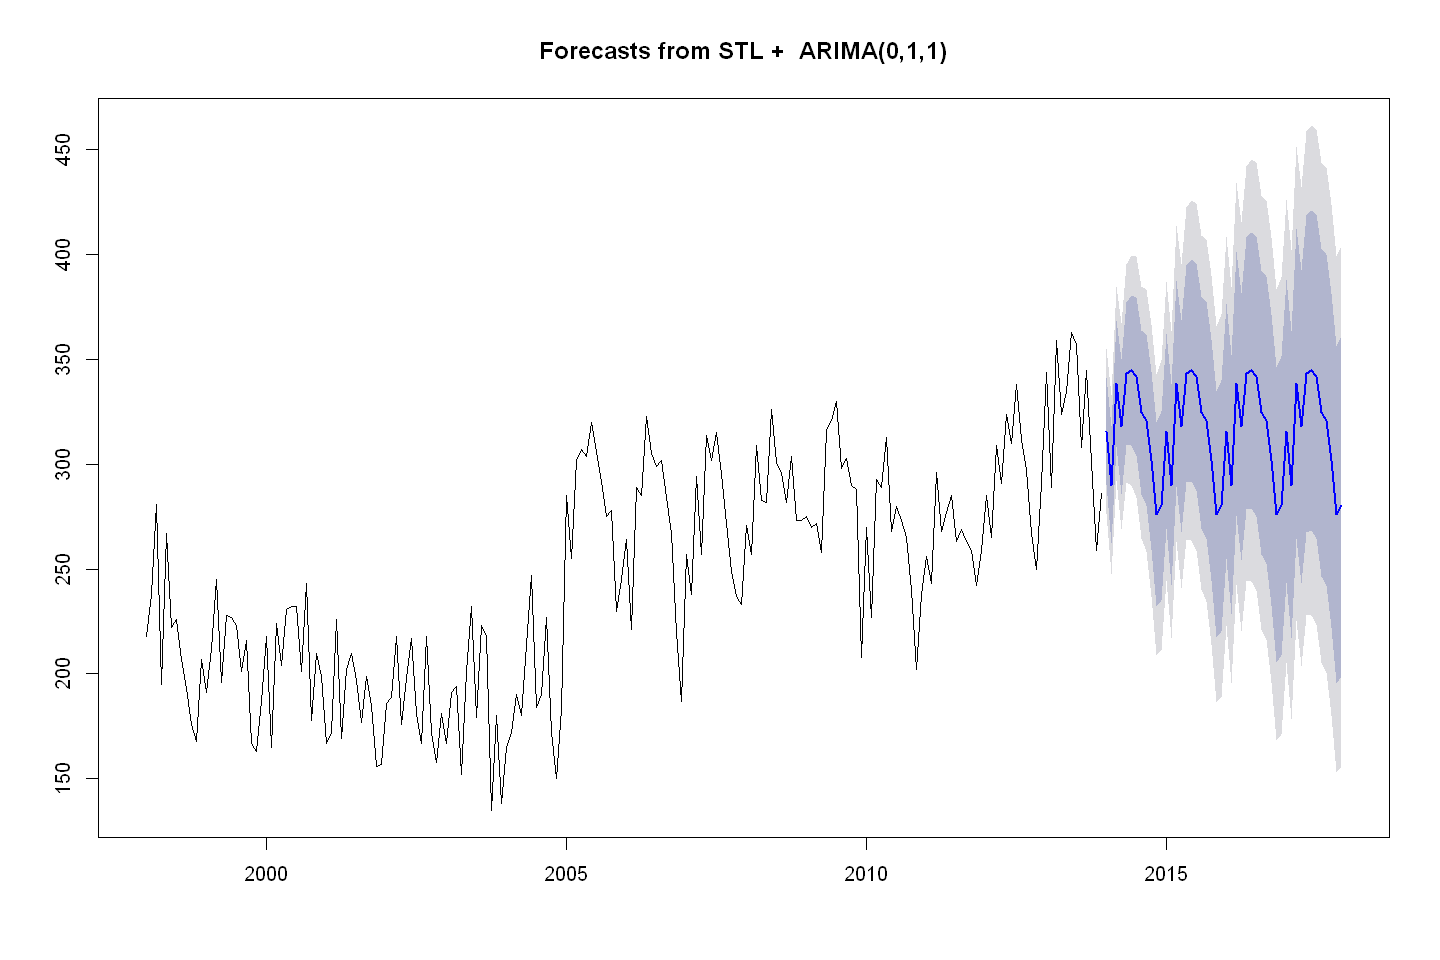

In [504]:
forecast_decomposed_suicide_series <- stlf(suicide_series_train, method='arima', h = 48)
plot(forecast_decomposed_suicide_series)

- Evaluating the forecasts

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.024471,19.89423,15.27388,-0.2002356,6.621737,0.5675677,-0.01144965,NA
Test set,-8.864959,24.00003,20.82885,-3.4205697,6.943263,0.7739871,0.05833164,0.7228049


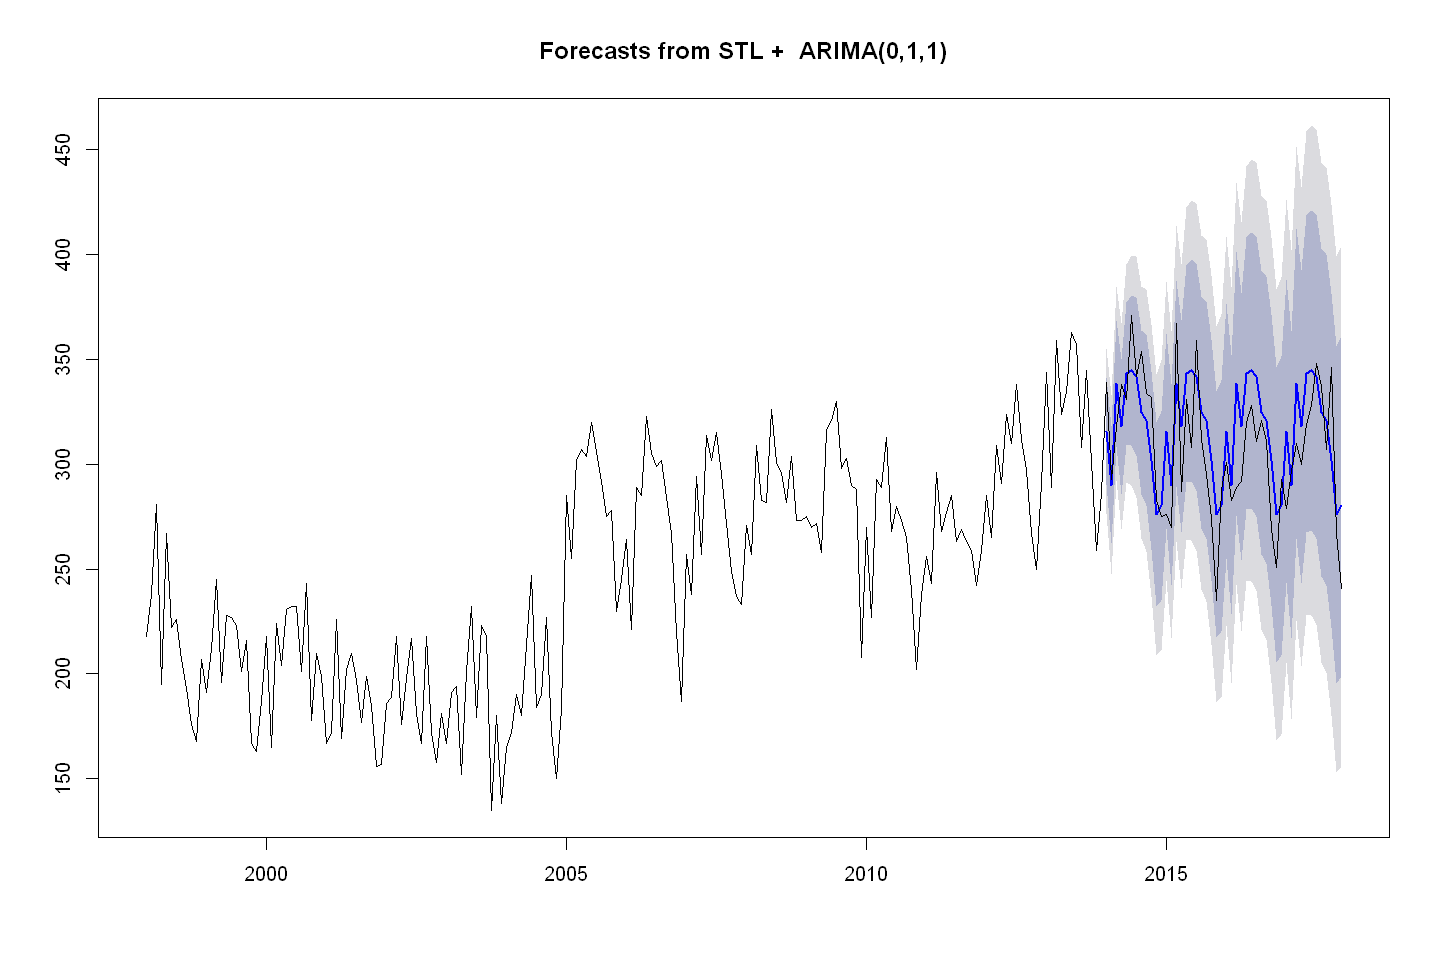

In [505]:
#Accuracy and plot
accuracy(forecast_decomposed_suicide_series, suicide_series_test)
plot(forecast_decomposed_suicide_series)
lines(suicide_1998_2017)

##### Forecasting with Holt-Winters Exponential Smoothing

If you have a time series that can be described using an additive model with increasing or decreasing trend and
seasonality, you can use Holt-Winters exponential smoothing to make short-term forecasts.

In [506]:
suicide_series_hw_forecasts  <- HoltWinters(suicide_series_train)
suicide_series_hw_forecasts

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = suicide_series_train)

Smoothing parameters:
 alpha: 0.4094368
 beta : 0.006114559
 gamma: 0.3334522

Coefficients:
           [,1]
a   309.1665554
b     0.1756057
s1    5.7093781
s2  -22.1624680
s3   30.8767563
s4    7.2282819
s5   31.5845167
s6   36.7446667
s7   33.2842689
s8   10.7927082
s9   13.5906965
s10 -12.9284466
s11 -38.0492814
s12 -24.9869868

The estimated values of alpha, beta and gamma are 0.40, 0.00, and 0.33, respectively. The value of alpha is relatively low, indicating that the estimate of the level at the current time point is based upon both recent observations and some observations in the more distant past. The value of beta is 0.00, indicating that the estimate of the slope b of the trend component is not updated over the time series, and instead is set equal to its initial value.
This makes good intuitive sense, as the level changes quite a bit over the time series, but the slope b of the trend
component remains roughly the same. The value of gamma (0.30) is low, indicating that the seasonal component don't change to much over time.


The observed values are plotted with the black line and the fitted values with the red one.

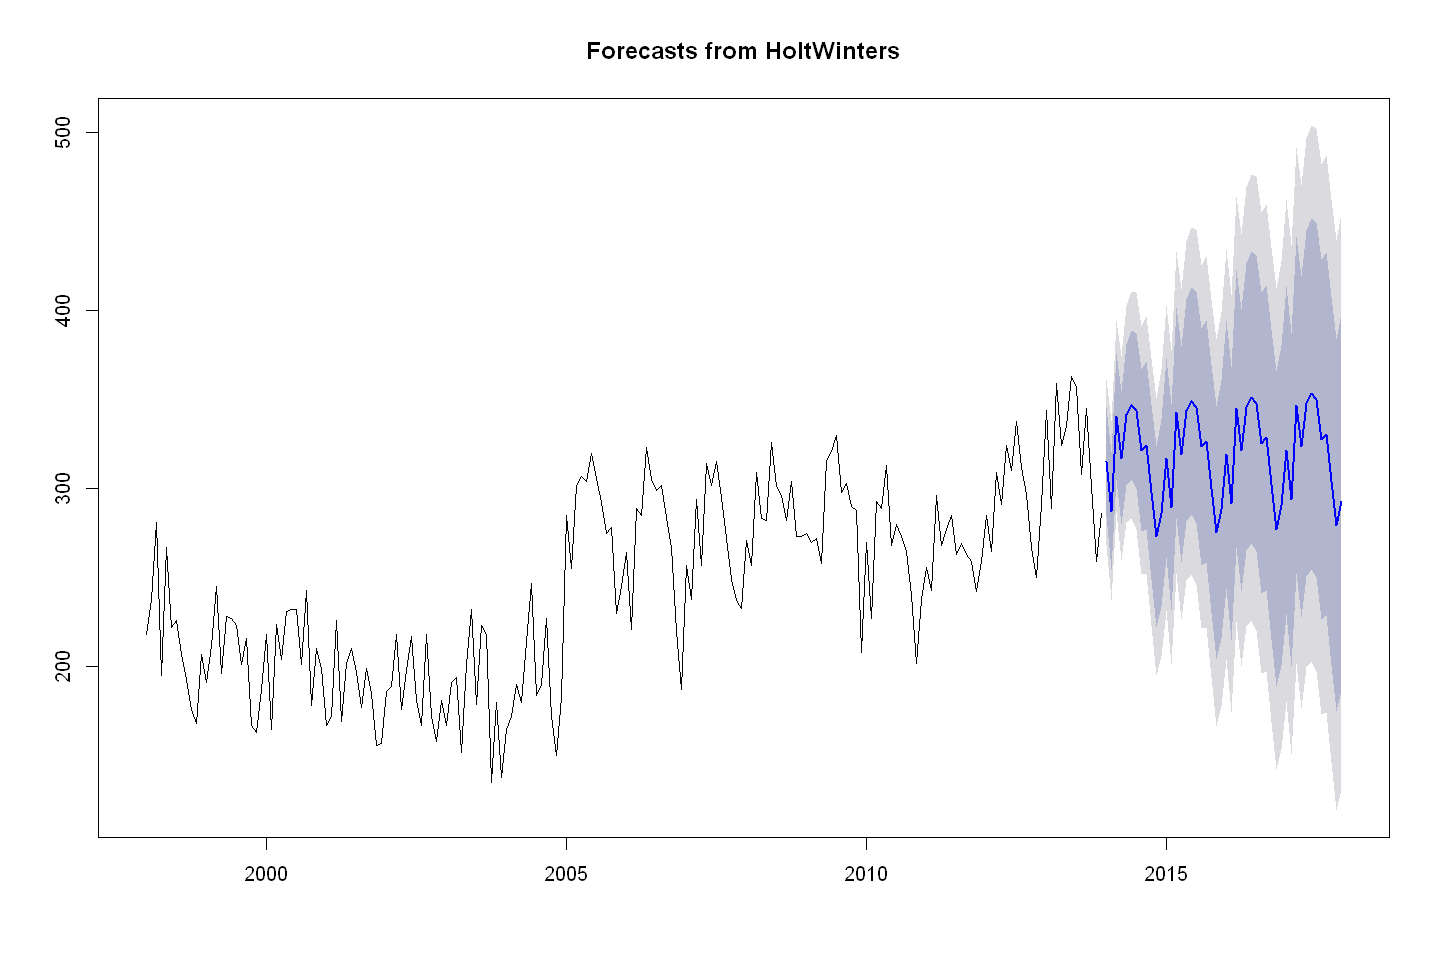

In [507]:
suicide_series_hw_future_forecasts <- forecast(suicide_series_hw_forecasts, h = 48)
plot(suicide_series_hw_future_forecasts)

*The forecasts are shown as a blue line, and the blue and grey shaded areas show 80% and 95% prediction
intervals, respectively.*

We can investigate whether the predictive model can be improved upon by checking whether the in-sample forecast
errors show non-zero autocorrelations at lags 1-12, by making a correlogram and carrying out the Ljung-Box test.

What is desired in time series is to build a model such that after extracting the trend and seasonality it can be certain that the waste is very similar to a white Gaussian noise. This assures us that we obtained all possible information from the data and that we can no longer know much more about the series in the errors. This also allows us to trust that the model is good and that its predictions therefore must be good.


	Box-Ljung test

data:  suicide_series_hw_future_forecasts_residuals
X-squared = 15.731, df = 12, p-value = 0.2039


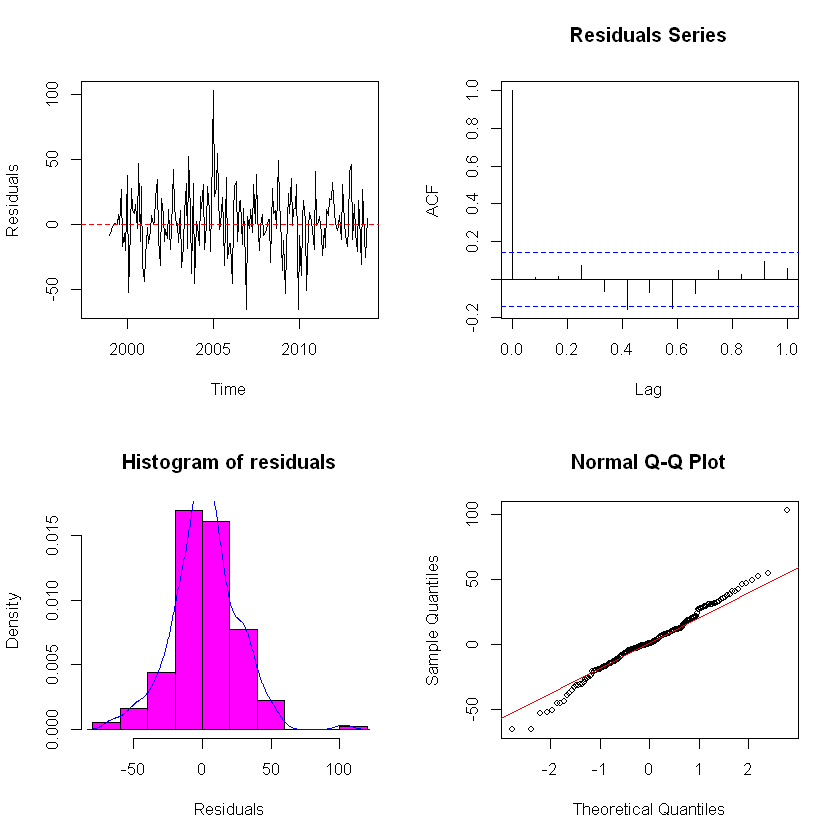

In [508]:
options(repr.plot.width=7, repr.plot.height=7)

#Ljung-Box test
suicide_series_hw_future_forecasts_residuals  <- residuals(suicide_series_hw_future_forecasts)
Box.test(suicide_series_hw_future_forecasts_residuals, lag=12, type = 'Ljung-Box')

#Graphic analysis
par (mfrow = c(2,2))
plot (suicide_series_hw_future_forecasts_residuals, ylab = 'Residuals')
abline (h=0, lty=2, col="2")
##Correlogram
acf (suicide_series_hw_future_forecasts_residuals, 12, na.action = na.pass, main = 'Residuals Series', ylab = 'ACF' )
##Histogram
hist(suicide_series_hw_future_forecasts_residuals, prob = T, col="6", main = 'Histogram of residuals', xlab = 'Residuals')
lines(density (na.omit(suicide_series_hw_future_forecasts_residuals)), col="4")
##Q-Q plot
qqnorm (suicide_series_hw_future_forecasts_residuals)
qqline (suicide_series_hw_future_forecasts_residuals,col="2")

The Ljung-Box test shows that the null hypothesis is accepted, that is, that the residuals behave like a white noise (zero mean, constant variance/homocedasticity and not correlated).

Checking the graphical analysis and the hypothesis test, **it is concluded that the model is not bad and that the residues behave similar to a white Gaussian noise.** Therefore, it can be considered that the predictions obtained from the model are good.

- Evaluating the forecasts

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.022322,23.76371,17.61132,0.0889481,7.552774,0.6544255,0.01031651,NA
Test set,-11.942568,26.37736,22.57345,-4.4423405,7.551316,0.8388151,0.09975748,0.7933364


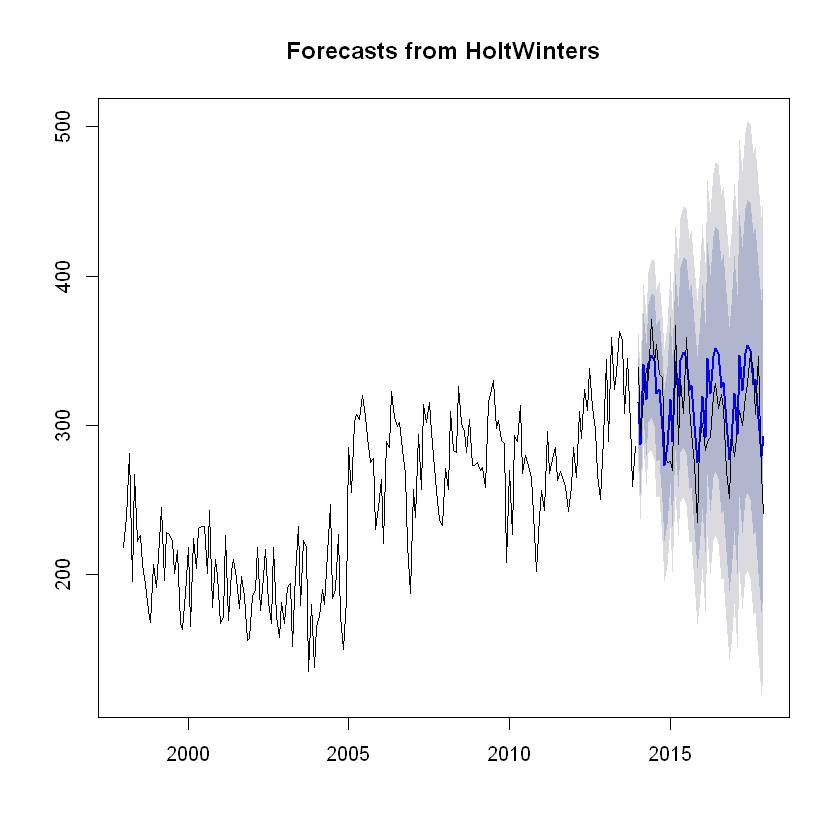

In [509]:
#Accuracy and plot
accuracy(suicide_series_hw_future_forecasts, suicide_series_test)
plot(suicide_series_hw_future_forecasts)
#lines(suicide_1998_2017)
lines(suicide_series_test)

If we want to apply other models like Arima we have to have in mind that most of the time series models work on the assumption that the time series is stationary.  Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

### 3.2. Stationarity Testing

We can assume the series to be stationary if it has these following statistical properties over time:

- Constant mean
- Constant variance
- An autocovariance that does not depend on time.

To test these conditions we will use the following methods:
- In the first one we'll see how their 'moving' statistics behave.
- In the second one we are going to observe the summary statistics.
- And in the last one we're going to use statistical tests.

#### 3.2.1. Moving statistics

We can plot the moving average and see if it varies with time, this is a smoothing method. By moving average We mean that at any instant ‘t’, we’ll take the average of the last year (in our case). We are going to plot it against the original time series and take a look at it.

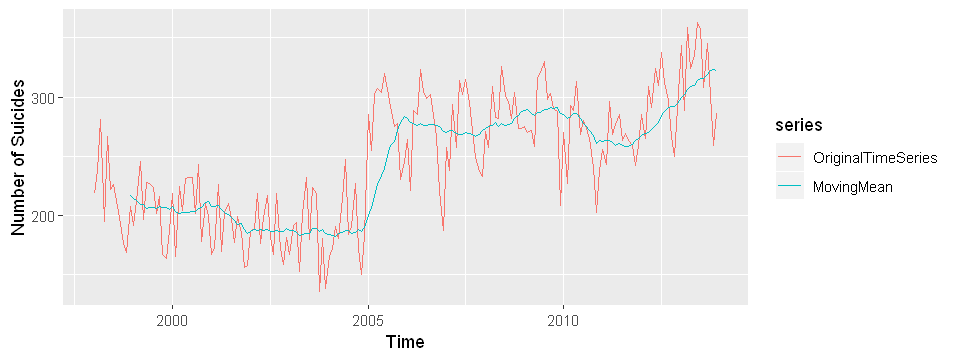

In [510]:
moving_mean_vs_OG <- function (OriginalTimeSeries, ylabel){
    MovingMean  <- SMA (OriginalTimeSeries, 12)
    Moving_mean_vs_OG  <- cbind(OriginalTimeSeries, MovingMean)
    options(repr.plot.width=8, repr.plot.height=3)
    autoplot(Moving_mean_vs_OG, ylab = ylabel)}

moving_mean_vs_OG(suicide_series_train, 'Number of Suicides')



The data smoothed with a simple moving average of order 12 gives a clearer picture of the trend component, and
we can see that **the number of suicides in Spain seems to have increased from about less than 200 cases to about almost 300
cases during 2005, and and since then the number of suicides has not diminished much, in fact, it has grown to exceed 300 in 2013.**


The mean is clearly non constant over time. It seems that the series is **non stationary** but we are going to keep checking.

#### 3.2.2. Summary Statistics

We are going to split suicide time series into two partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.

In [511]:
Stationarity_descriptive_test <- function (timeseries){
    split  <-  length(timeseries) / 2
    X1 <-  timeseries[0:split]
    X2  <- timeseries[split: length(timeseries)]
    print (paste('Mean of the first partition =', mean(X1)))
    print (paste('Mean of the second partition =', mean(X2)))
    print (paste('Variance of the first partition =', var(X1)))
    print (paste('Variance of the second partition =', var(X2)))}

Stationarity_descriptive_test (suicide_series_train)

[1] "Mean of the first partition = 207.833333333333"
[1] "Mean of the second partition = 282.340206185567"
[1] "Variance of the first partition = 1626.47719298246"
[1] "Variance of the second partition = 1170.24763745704"


Running the code above, we can see the mean and variance look very different over time. It seems that we have a **non-stationary** time series.

#### 3.2.3. Statistical Tests

The ADF test has an alternate hypothesis of linear or difference stationary, while the KPSS test identifies trend-stationarity in a series.

ADF:
- Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

KPSS

In [512]:
Stationarity_statistical_tests <- function(timeseries){
    print(adf.test (timeseries))
    print(kpss.test (timeseries))}
    
Stationarity_statistical_tests(suicide_series_train)

Warning message in adf.test(timeseries):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  timeseries
Dickey-Fuller = -4.4033, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(timeseries):
"p-value smaller than printed p-value"


	KPSS Test for Level Stationarity

data:  timeseries
KPSS Level = 2.558, Truncation lag parameter = 4, p-value = 0.01



In the Dickey Fuller test the p-value is lower than 0.05 so it's stationary.

However, in the Kpss test the p-value is lower than 0.05 so the null hypothesis of stationarity is rejected.

We aren't very sure about the stationarity of our series although it seems a non stationary one.

## 4. Forecasting with ARIMA

ARIMA stands for AutoRegressive Integrated Moving Average. Automatic Regression (AR) is the term that refers to the delays of the differentiated series, Moving Average (MA) refers to the delays of the errors and the integration (I) is the number of differences used to make the series of times is stationary.

As we said before, there are some necessary conditions for the ARIMA Model:

- The data must be stationary, this means that the properties of the series do not depend on the moment in which they are captured. A series of white noise and series with cyclic behavior can also be considered as stationary series.

- The data must be univariate, ARIMA works in a single variable. Automatic regression has to do with the regression of past values.


The first thing we are going to do is eliminate the non-stationary part of our series. To facilitate the analysis here, we will also eliminate the seasonal part of the data. The seasonal part can be removed from the analysis and added later, or it can be treated in the ARIMA model itself.

### 4.1.  Conversion to Stationary

This consists of modeling or estimating the trend and seasonality in the series and eliminating them from the series to obtain a stationary series. Then statistical forecasting techniques can be implemented in this series.

#### 4.1.1.  Smoothing

First of all, we are going to reduce trend by applying Box Cox transformation.

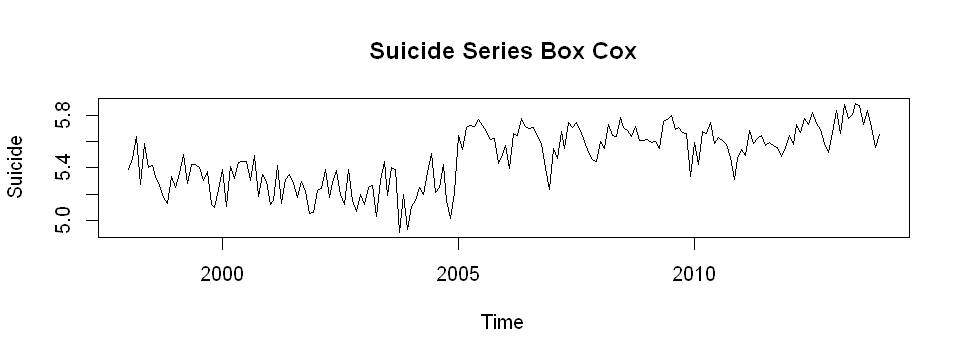

In [513]:
suicide_series_BoxCox <- BoxCox(suicide_series_train, lambda = 0)

options(repr.plot.width=8, repr.plot.height=3)
plot(suicide_series_BoxCox, ylab = 'Suicide', main = 'Suicide Series Box Cox')

#### 4.1.2. Differencing
Transformations such as logarithms or Box Cox can help to stabilise the variance of a time series. Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

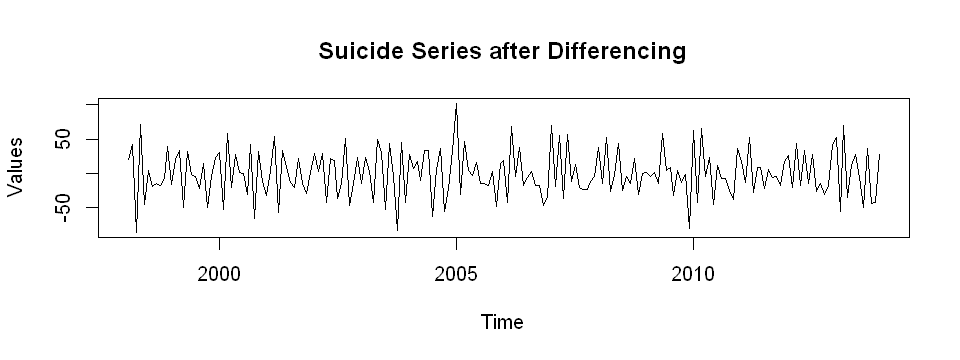

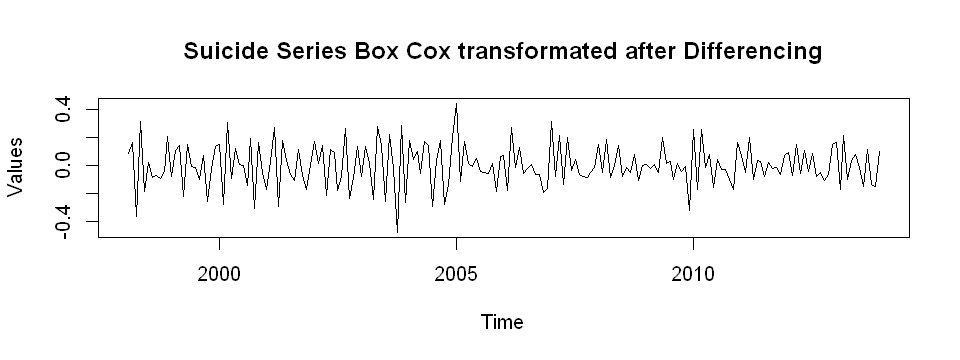

In [514]:
suicide_series_diff <- diff(suicide_series_train)
suicide_series_diff_BoxCox <- diff(suicide_series_BoxCox)

options(repr.plot.width=8, repr.plot.height=3)
plot(suicide_series_diff, ylab = 'Values', main = 'Suicide Series after Differencing')
plot(suicide_series_diff_BoxCox, ylab = 'Values', main = 'Suicide Series Box Cox transformated after Differencing')

The Box Cox transformated series looks better to me, we are going to choose it to keep working with.

Now we are going to test the resulting series **after the transformation.**
We are going to use the sationarity tests that we did before.

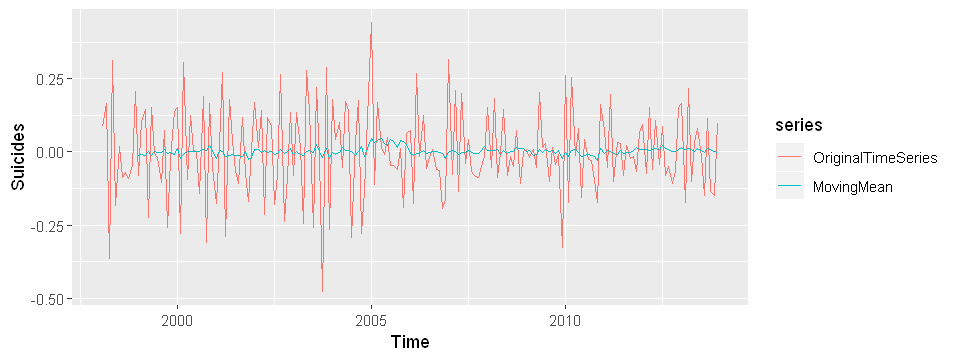

In [515]:
#Visual test with moving mean
moving_mean_vs_OG(suicide_series_diff_BoxCox, 'Suicides')

The mean keeps constant over time. Seems that now we have a stationary series.

In [516]:
#Numerical test contrasting mean and variance at different time points
Stationarity_descriptive_test(suicide_series_diff_BoxCox)

[1] "Mean of the first partition = 0.00122908576584883"
[1] "Mean of the second partition = 0.00123696617475356"
[1] "Variance of the first partition = 0.0308838033766116"
[1] "Variance of the second partition = 0.0143837443879929"


Both mean and variance don't change almost anything over time.

In [517]:
#KPSS and ADF hypothesis tests for stationarity
Stationarity_statistical_tests(suicide_series_diff_BoxCox)

Warning message in adf.test(timeseries):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  timeseries
Dickey-Fuller = -7.767, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(timeseries):
"p-value greater than printed p-value"


	KPSS Test for Level Stationarity

data:  timeseries
KPSS Level = 0.019277, Truncation lag parameter = 4, p-value = 0.1



Our new time series passed the tests with 1 difference. We have a **stationary time series**

Also we can use 'ndiffs' function to see the number of differences required for our time series to pass the stationarity statistical tests. We are going to check this out for the 'kpss', 'adf' and 'pp' tests.

In [518]:
ndiffs(suicide_series_train, test= 'kpss')

[1] 1

In [519]:
ndiffs(suicide_series_train, test= 'adf')

[1] 1

In [520]:
ndiffs(suicide_series_train, test='pp')

[1] 0

##### *We can definitely assume that our time series needs a differentiation of order 1 to become stationary*

We have converted the data into stationary but we have seen that there is a seasonal component in our time series.

We are going to take a look at the seasonal component to see if one order differencing is enough to get rid of it:

In [521]:
STL_suicide_diff_BoxCox_components <- mstl(suicide_series_diff_BoxCox)
seasonal(STL_suicide_diff_BoxCox_components)

              Jan          Feb          Mar          Apr          May
1998              -0.005710004  0.176525928 -0.189598257  0.171724265
1999  0.080264248 -0.007633069  0.175318017 -0.185159892  0.169387705
2000  0.085565483 -0.009554451  0.174116543 -0.180710335  0.167067168
2001  0.090886353 -0.014762500  0.173485422 -0.172303929  0.161896579
2002  0.099314489 -0.019939237  0.172892254 -0.163852929  0.156773620
2003  0.107775808 -0.027899549  0.167640801 -0.145130164  0.146877917
2004  0.130273207 -0.035904560  0.162340317 -0.126460762  0.136941466
2005  0.152810414 -0.045591427  0.157099507 -0.106147851  0.128986416
2006  0.164675289 -0.055425652  0.151747195 -0.085910584  0.120997207
2007  0.176714163 -0.068408093  0.159787342 -0.077342846  0.111020176
2008  0.168640876 -0.081543605  0.167692295 -0.068892424  0.100940549
2009  0.160607958 -0.086431854  0.170231692 -0.070156401  0.096495402
2010  0.157764611 -0.091311437  0.172742082 -0.071487060  0.091947421
2011  0.154660602 -0

First order differencing seems enough to get what we need. The values are close to zero and have clearly changed since the original series seasonal component.

### 4.2. Best ARIMA model

We already have the data that meet the conditions Arima asks us for. With this data we would pass on to calculate the appropriate parameters (p, d, q and P, D, Q) to choose the model that best fits with the values of acf and pcf function applied to our transformated and differenced time series.

However, we have chosen to use the 'auto.arima' function that facilitates our work choosing the best parameters.

The 'auto.arima' function returns the best ARIMA model according to either AIC, AICc or BIC value. The function conducts a search over possible model within the order constraints provided.

#### 4.2.1. Estimating

Throughout the analysis we have arrived at a series of conclusions that we are going to include in the model parameters:

- We know that our original time series is non stationary.
- We know that our original time series has a seasonal component.
- Also, we know that we only need a differencing of first order to make the data stationary (d=1) and we don't need another differencing to deal with seasonality (D=0) so we will be more efficient and we will introduce the parameters d and D in the function.

In [522]:
suicide_series_best_arima <- auto.arima(suicide_series_train, d = 1, D = 0, trace = TRUE, stationary = FALSE, seasonal = TRUE, lambda = 0)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2)(1,0,1)[12] with drift         : Inf
 ARIMA(0,1,0)            with drift         : -175.7923
 ARIMA(1,1,0)(1,0,0)[12] with drift         : -256.7385
 ARIMA(0,1,1)(0,0,1)[12] with drift         : -251.0288
 ARIMA(0,1,0)                               : -177.8177
 ARIMA(1,1,0)            with drift         : -214.9726
 ARIMA(1,1,0)(2,0,0)[12] with drift         : -269.5226
 ARIMA(1,1,0)(2,0,1)[12] with drift         : Inf
 ARIMA(0,1,0)(2,0,0)[12] with drift         : -227.1203
 ARIMA(2,1,0)(2,0,0)[12] with drift         : -283.742
 ARIMA(2,1,1)(2,0,0)[12] with drift         : -284.0654
 ARIMA(3,1,2)(2,0,0)[12] with drift         : -282.7405
 ARIMA(2,1,1)(2,0,0)[12]                    : -286.0115
 ARIMA(2,1,1)(1,0,0)[12]                    : -272.487
 ARIMA(2,1,1)(2,0,1)[12]                    : Inf
 ARIMA(1,1,1)(2,0,0)[12]                    : -279.9769
 ARIMA(3,1,1)(2,0,0)[12]                    : -286.1123
 ARIMA(

The arima model that best fits is this: ARIMA(4,1,2)(2,0,0)[12] with drift.

To check if it is valid we will observe how its residuals behave as we did in the Holt-Winters model.

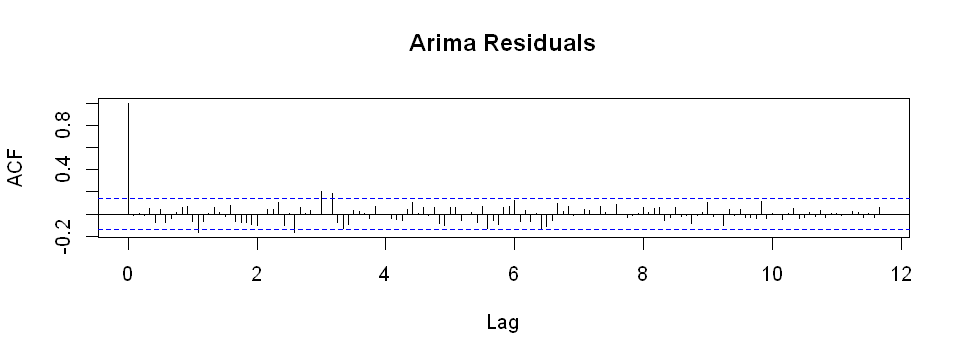

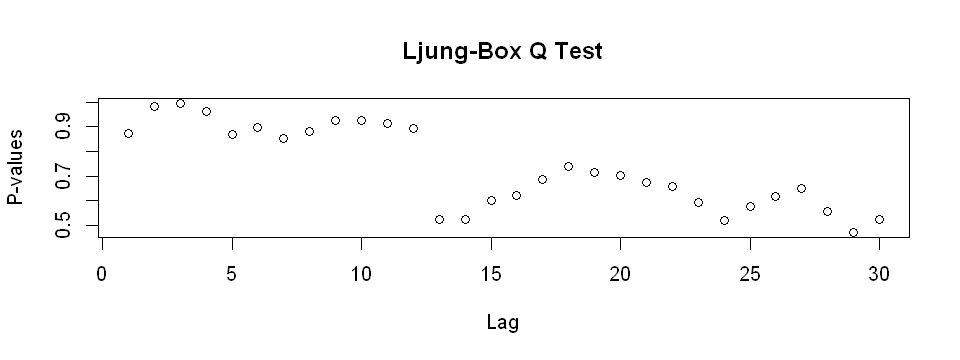

In [523]:
suicide_series_best_arima_residuals  <-  residuals(suicide_series_best_arima)
#Autocorrelation
acf(suicide_series_best_arima_residuals, main = 'Arima Residuals', lag.max = 140)
box_test_suicide_series_best_arima <- LjungBoxTest (suicide_series_best_arima_residuals)
plot(box_test_suicide_series_best_arima[,3],main= "Ljung-Box Q Test", ylab= "P-values", xlab= "Lag")

In [524]:
box_test_suicide_series_best_arima

,m,Qm,pvalue
,1,0.03,0.8732711
,2,0.04,0.9808435
,3,0.08,0.9946302
,4,0.59,0.9641393
,5,1.84,0.8709012
,6,2.24,0.8966763
,7,3.34,0.8523778
,8,3.71,0.8821051
,9,3.74,0.9274603
,10,4.44,0.9254703


*The ACF of the residuals shows non-significant autocorrelations.*
*Also, all the values of p for the Ljung-Box Q test are above 0.05, which indicates that the data is not dependent.*

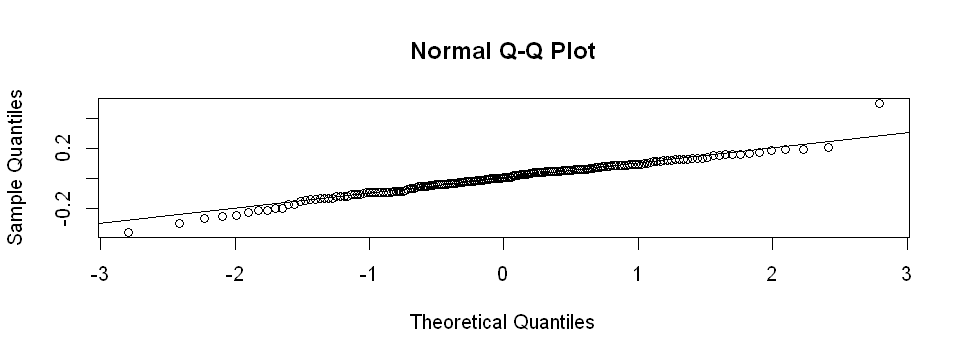

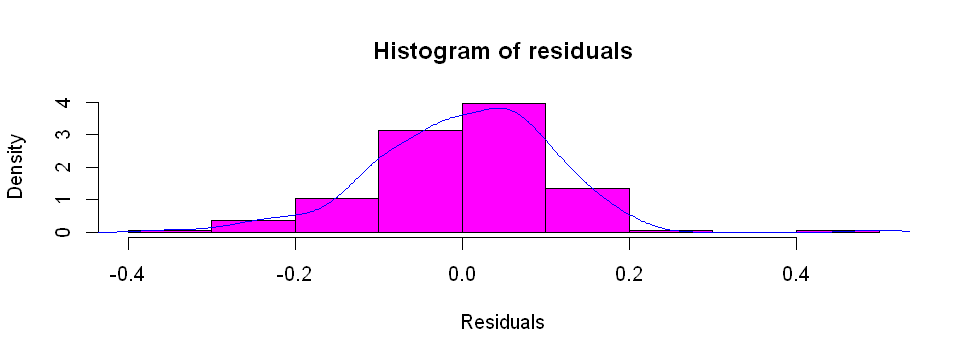

In [525]:
#Normal Q-Q plot
qqnorm(suicide_series_best_arima_residuals)
qqline(suicide_series_best_arima_residuals)

#Histogram
hist(suicide_series_best_arima_residuals, prob = T, col="6", main = 'Histogram of residuals', xlab = 'Residuals')
lines(density (na.omit(suicide_series_best_arima_residuals)), col="4")

*The values are normal since they rest on a line and aren't everywhere.*

As the graphs support the assumption that there is no pattern in the residuals, we can go ahead and calculate the forecast.

#### 4.2.2.  Forecasting

The following is the plot of the next two years forectasts (blue line). The shadowed blue is the 80% of confidence and the shadowed grey is the 95%.

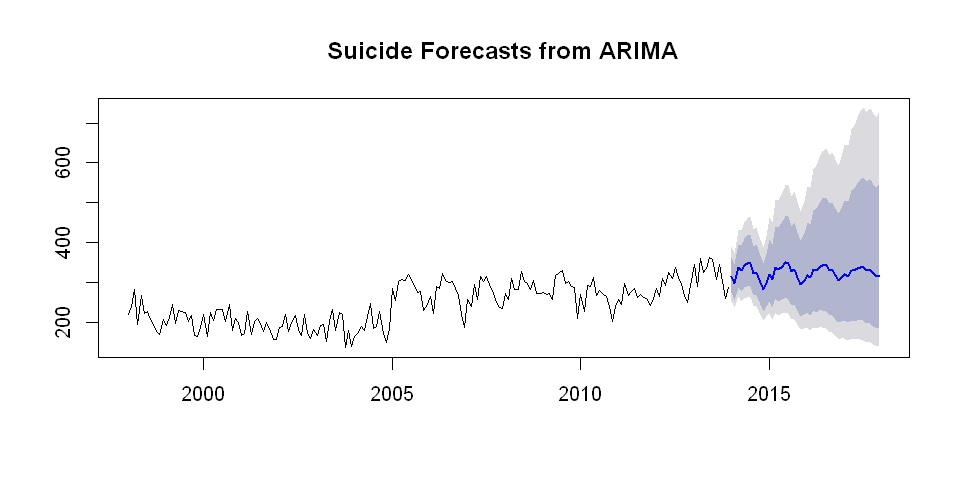

In [526]:
options(repr.plot.width=8, repr.plot.height=4)
suicide_series_best_arima_forecast <- forecast(suicide_series_best_arima, h = 48)
plot(suicide_series_best_arima_forecast, main= 'Suicide Forecasts from ARIMA')

In [527]:
suicide_series_best_arima_forecast

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2014       315.3111 273.9026 362.9796 254.2313 391.0654
Feb 2014       296.6094 255.2995 344.6036 235.8141 373.0785
Mar 2014       336.8512 286.9657 395.4087 263.6220 430.4221
Apr 2014       329.2213 276.5247 391.9601 252.1344 429.8764
May 2014       342.2605 286.0146 409.5673 260.0843 450.4010
Jun 2014       346.8664 288.5884 416.9133 261.8129 459.5508
Jul 2014       348.1607 288.4545 420.2254 261.1119 464.2298
Aug 2014       322.6810 266.3977 390.8556 240.6935 432.5960
Sep 2014       323.7929 266.1091 393.9805 239.8577 437.1001
Oct 2014       299.8351 244.9772 366.9774 220.1253 408.4087
Nov 2014       280.7847 227.7631 346.1492 203.8774 386.7031
Dec 2014       298.1849 239.8208 370.7527 213.7024 416.0656
Jan 2015       319.8768 251.3646 407.0626 221.2538 462.4605
Feb 2015       305.9616 237.4466 394.2467 207.6261 450.8708
Mar 2015       337.0462 258.5400 439.3908 224.6803 505.6079
Apr 2015       331.3375 251.3928 436.705

- Evaluating the forecasts

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.476404,24.66054,19.33544,-0.2741215,8.324654,0.7184928,0.005345451,NA
Test set,-16.638663,30.16646,25.66083,-6.2342488,8.824320,0.9535404,0.228991819,0.9258698


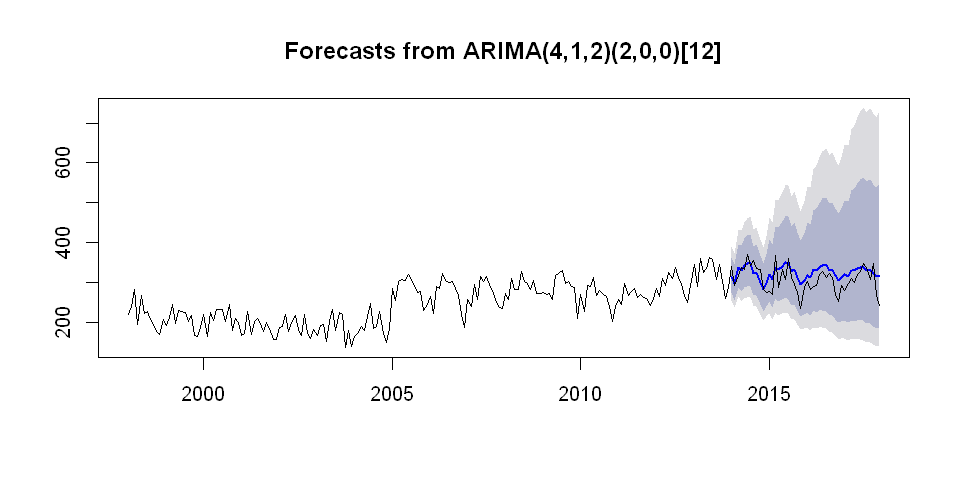

In [528]:
#Accuracy and plot
accuracy(suicide_series_best_arima_forecast, suicide_series_test)
plot(suicide_series_best_arima_forecast)
lines(suicide_1998_2017)

#### *Comparison of predictive models carried out throughout the project on suicide in Spain.*

In [529]:
accuracy(forecast_decomposed_suicide_series_train, suicide_series_test)
accuracy(suicide_series_hw_future_forecasts, suicide_series_test)
accuracy(suicide_series_best_arima_forecast, suicide_series_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.024471,19.89423,15.27388,-0.2002356,6.621737,0.5675677,-0.01144965,NA
Test set,-8.864959,24.00003,20.82885,-3.4205697,6.943263,0.7739871,0.05833164,0.7228049


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.022322,23.76371,17.61132,0.0889481,7.552774,0.6544255,0.01031651,NA
Test set,-11.942568,26.37736,22.57345,-4.4423405,7.551316,0.8388151,0.09975748,0.7933364


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.476404,24.66054,19.33544,-0.2741215,8.324654,0.7184928,0.005345451,NA
Test set,-16.638663,30.16646,25.66083,-6.2342488,8.824320,0.9535404,0.228991819,0.9258698


Seems that the two ARIMAs give us best results than the Holt Winters model.  The most generalizable model is the ARIMA calculated at the begining with the stl decomposition. There doesn't seem to be overfitting.

Our predictions have a lot of dispersion but, as we said at the beginning, we face a stochastic process and the characteristics of the object of study require much more information for more accurate predictions.

Suicide is a complex social fact and this small analysis just wanted to get a little closer to this problem that needs much more dedication.

# Analysis of Unemployment Series

## 1. Reading the Data

In [530]:
wkdir_and_path <- cbind(working_directory,'Data\\Monthly_unemployment_Spain_1998-2017.csv')
unemployment_filepath <- str_c(wkdir_and_path, collapse = "\\")
unemployment_1998_2017 <- read.csv(unemployment_filepath)
unemployment_1998_2017

Date,N_of_unemployed
1998-01-31,2577189
1998-02-28,2553346
1998-03-31,2524004
1998-04-30,2442803
1998-05-31,2369889
1998-06-30,2332016
1998-07-31,2250015
1998-08-31,2235296
1998-09-30,2256328
1998-10-31,2267925


Seems that our date index is not very useful in R code. It automatically converts our list of values into a time series if you give it start date and frequency.

## 2. Creating and exploring the Time Series

In [531]:
unemployment_1998_2017 <- ts (unemployment_1998_2017$N_of_unemployed, frequency = 12, start = c(1998,1))
class(unemployment_1998_2017)

[1] "ts"

In [532]:
#Here we have the start of our time series
start(unemployment_1998_2017)

[1] 1998    1

In [533]:
#And the end
end(unemployment_1998_2017)

[1] 2017   12

In [534]:
#The cycle of this time series is 12 months in a year
frequency(unemployment_1998_2017)

[1] 12

In [535]:
cycle(unemployment_1998_2017)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1998   1   2   3   4   5   6   7   8   9  10  11  12
1999   1   2   3   4   5   6   7   8   9  10  11  12
2000   1   2   3   4   5   6   7   8   9  10  11  12
2001   1   2   3   4   5   6   7   8   9  10  11  12
2002   1   2   3   4   5   6   7   8   9  10  11  12
2003   1   2   3   4   5   6   7   8   9  10  11  12
2004   1   2   3   4   5   6   7   8   9  10  11  12
2005   1   2   3   4   5   6   7   8   9  10  11  12
2006   1   2   3   4   5   6   7   8   9  10  11  12
2007   1   2   3   4   5   6   7   8   9  10  11  12
2008   1   2   3   4   5   6   7   8   9  10  11  12
2009   1   2   3   4   5   6   7   8   9  10  11  12
2010   1   2   3   4   5   6   7   8   9  10  11  12
2011   1   2   3   4   5   6   7   8   9  10  11  12
2012   1   2   3   4   5   6   7   8   9  10  11  12
2013   1   2   3   4   5   6   7   8   9  10  11  12
2014   1   2   3   4   5   6   7   8   9  10  11  12
2015   1   2   3   4   5   6   7   8   9  10  

In [536]:
#Here we have some descriptive statistics
summary(unemployment_1998_2017)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
1835738 2050295 2361732 3049950 4112796 5040222 

The first basic plot that we are going to use is a line graph with the values of the series in the ordinate and the temporal instants on the abscissa axis. Constructing this graph can be very useful to observe some characteristics of our time series.

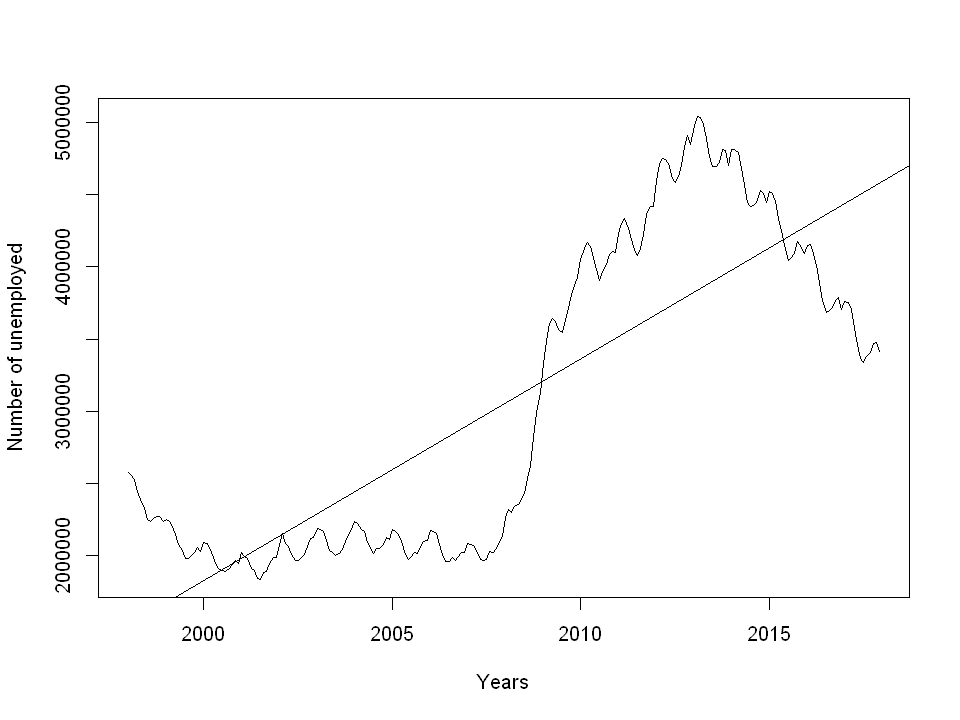

In [537]:
options(repr.plot.width=8, repr.plot.height=6)
#The number of unemployed in Spain
plot(unemployment_1998_2017, xlab = 'Years', ylab = 'Number of unemployed')

#this will fit in a line
abline(reg=lm(unemployment_1998_2017~time(unemployment_1998_2017)))

It seems that the mean, the variance and the covariance are not constant over time. This makes us think that we are facing a **non-stationary series**, although this is something that we will analyze in more detail later.

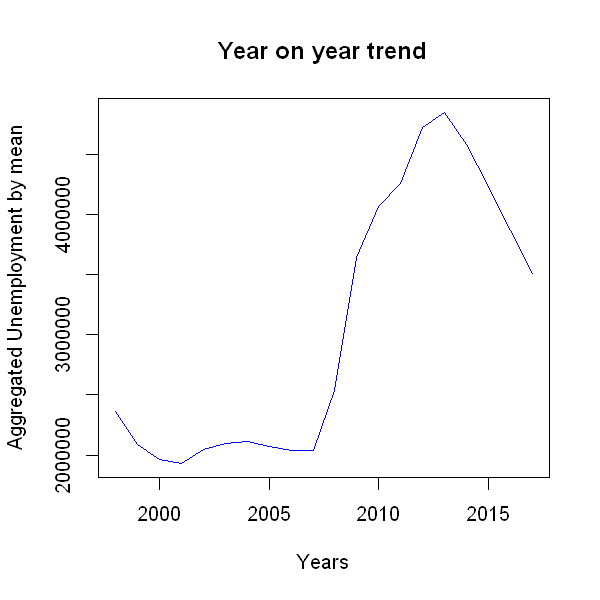

In [538]:
#In this plot we are going to aggregate the cycles and display a year on year trend
options(repr.plot.width=5, repr.plot.height=5)
plot(aggregate(unemployment_1998_2017,FUN=mean), xlab = "Years", ylab = "Aggregated Unemployment by mean", main = 'Year on year trend', col = 'blue')

In [539]:
aggregate(unemployment_1998_2017,FUN=mean)

Time Series:
Start = 1998 
End = 2017 
Frequency = 1 
 [1] 2359359 2085221 1963462 1930157 2049607 2096887 2113718 2069854 2039414
[10] 2039004 2539941 3644041 4060756 4257160 4720404 4845302 4575937 4232132
[19] 3868898 3507743

The year on year trend clearly shows that the **number of unemployed in Spain increased from 2007 to 2013 and decreased from 2013 to 2017 significantly.**

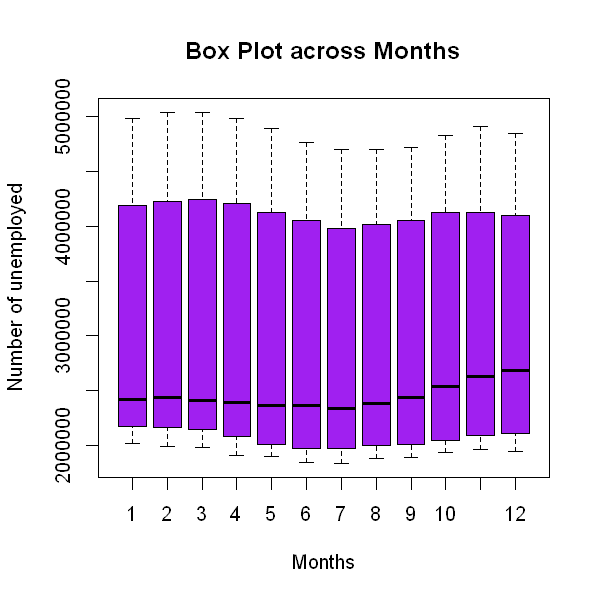

In [540]:
#Box plot across months will give us a sense on seasonal effect
options(repr.plot.width=5, repr.plot.height=5)
boxplot(unemployment_1998_2017~cycle(unemployment_1998_2017), xlab = 'Months', ylab = 'Number of unemployed', main = 'Box Plot across Months',col = 'purple')

The mean value of unemployed in **the last months of the year is higher than rest of the months.** 
Also it shows a great variance due to the large peaks that make our distribution not behave in a very normal way.

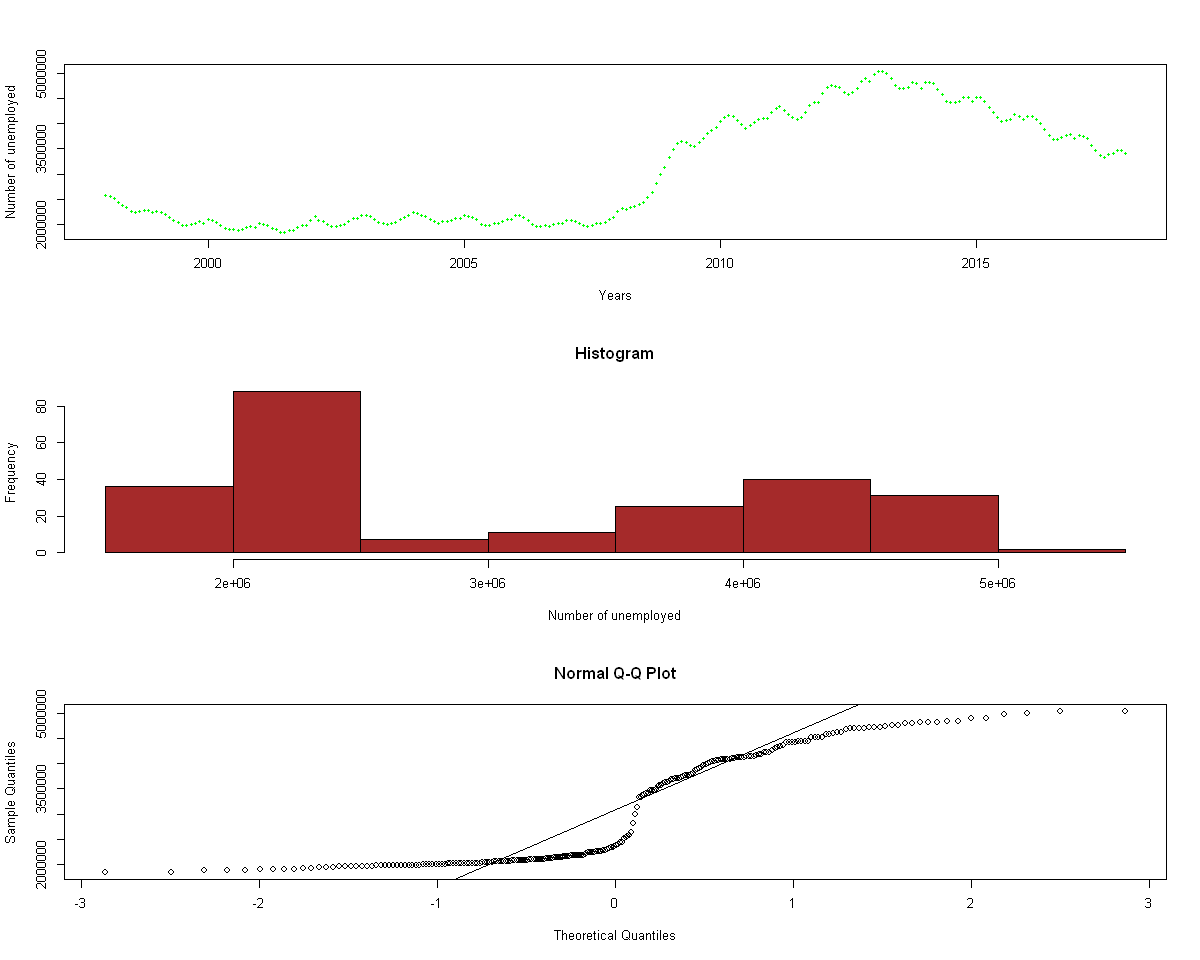

In [541]:
date = make_date(year = 1998, month = 1)
Date_range = seq(from = date, by = 'month', length.out = length(unemployment_1998_2017))

options(repr.plot.width=10, repr.plot.height=8)

par(mfrow=c(3,1)) 

#Scatter plot
plot(unemployment_1998_2017, x = Date_range, xlab = 'Years', ylab = 'Number of unemployed', pch=20, cex=0.7, col = 'green')

#histogram
hist (unemployment_1998_2017, xlab = 'Number of unemployed', main = 'Histogram', col = 'brown')

#Q-Q plot
qqnorm(unemployment_1998_2017)
qqline(unemployment_1998_2017)

In [542]:
ks.test(unemployment_1998_2017, "pnorm", 3049949.785875, 3049949.785875)


	One-sample Kolmogorov-Smirnov test

data:  unemployment_1998_2017
D = 0.34527, p-value < 2.2e-16
alternative hypothesis: two-sided


The graphs show us that it seems that in our distribution there are not very anomalous values and it's NOT close to a Gaussian distribution.

## 3. Time Series Components Analysis

We are going to use the same methodology that we used for the suicide series. *So I will not repair so much in explaining the usefulness of each step*.

*Let's start to analyze each of its components with a little more detail, but first we are going to split our time series in a train and a test sets.*

In [543]:
unemployment_series_test  <- tail(unemployment_1998_2017,48)
unemployment_series_train  <- head(unemployment_1998_2017, 192)

### 3.1. Decomposition methods

#### 3.1.1. Moving Averages

We present the methodology of moving averages because it's the first step in the classical decomposition and allows us to observe **the trend** of our time series represented in a smoothed way. It can be a good method to extract information in temporary series where there are no fluctuations due to trend or seasonality.

It is possible to apply a moving average to a moving average. One reason for doing this is to make an even-order moving average symmetric. It's recommended to use a 2x12 Moving averages to estimate the trend-cycle of monthly data:

Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 12 rows containing missing values (geom_path)."

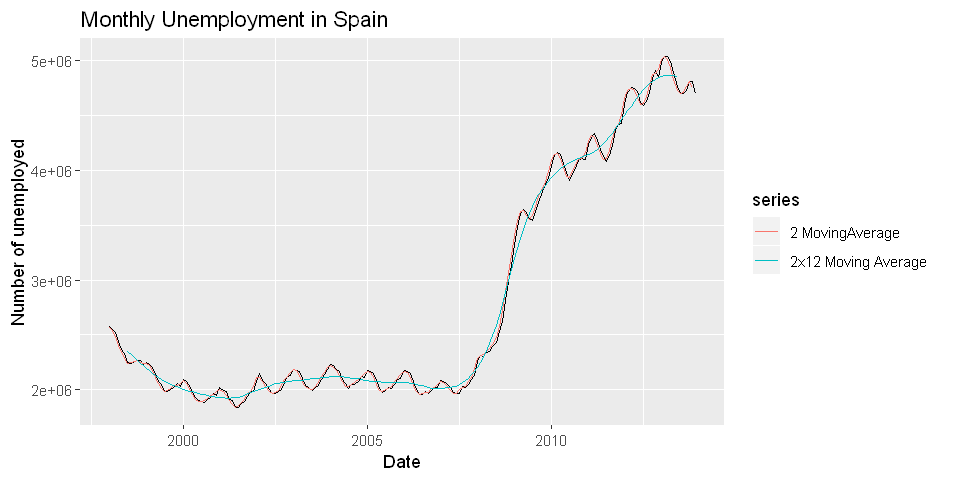

In [544]:
options(repr.plot.width=8, repr.plot.height=4)

#Applying Moving Averages
autoplot(unemployment_series_train) +
    autolayer(ma(unemployment_series_train, order=2, centre=FALSE), series='2 MovingAverage')+
    autolayer(ma(unemployment_series_train,12, centre = TRUE), series='2x12 Moving Average') +
    xlab('Date') + ylab('Number of unemployed') +
    ggtitle('Monthly Unemployment in Spain') +
    guides(colour=guide_legend(title='series'))

The moving average helps us to reduce the noise or short-term volatility in the movements of the data and in this way allows us to better evaluate the quality and direction of a trend.

Let's start with decomposition and seasonal adjustments

#### 3.1.2. Classic Decomposition

We are going to use decompose function to see the components of our time series in a classic decomposition method, jut to have a first look:

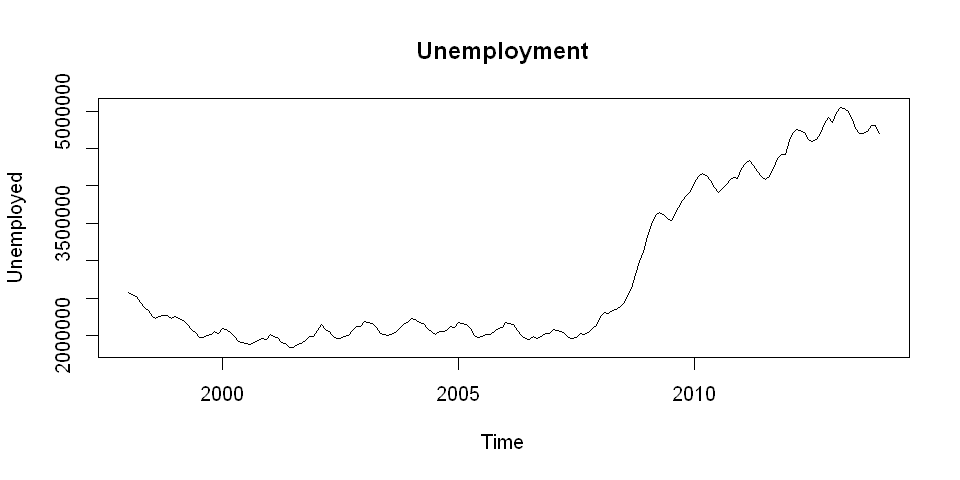

In [545]:
unemployment_series_components  <- decompose(unemployment_series_train)
plot(unemployment_series_train, main = 'Unemployment', ylab = 'Unemployed')

The plot above shows the original time series (top), the estimated trend component (second from top), the estimated seasonal component (third from top), and the estimated irregular component (bottom). 

Just like with suicide series, it seems that we have to deal with a trend and a seasonal component. Let's confirm this plotting the autocorrelation function of our time series:

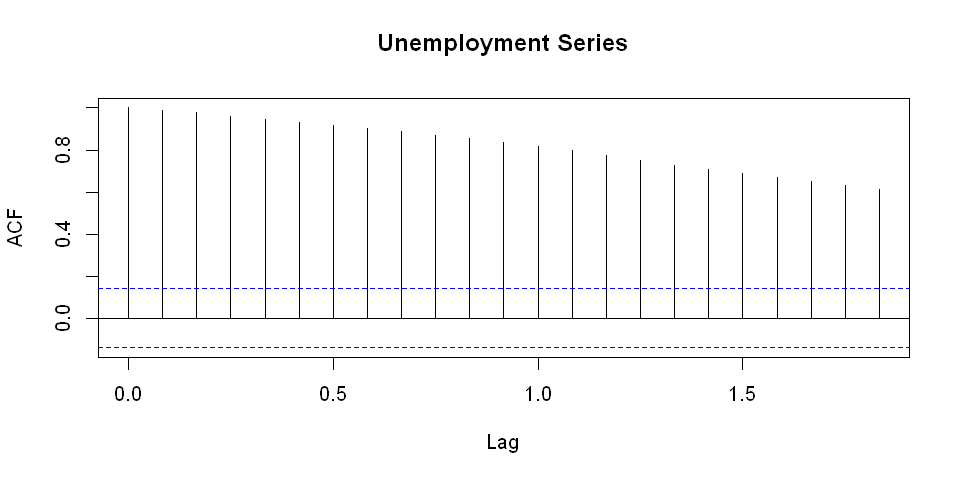

In [546]:
acf(unemployment_series_train, main = 'Unemployment Series')

As we see, clearly, **we have a important seasonal component**.

Classical decomposition methods are good but we want to see the variation of the seasonal component over the time. We are going to use STL method:

#### 3.1.3. STL decomposition

In [547]:
STL_unemployment_components <- mstl(unemployment_series_train)

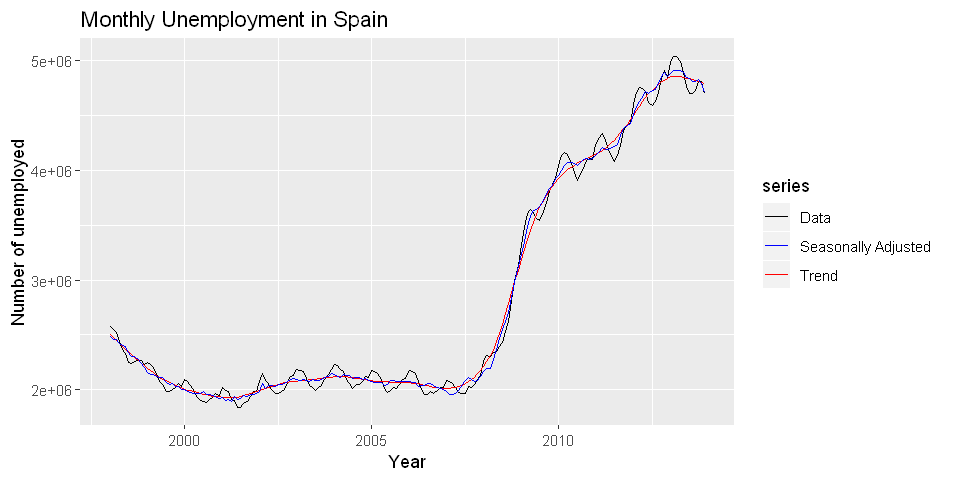

In [548]:
options(repr.plot.width=8, repr.plot.height=4)
autoplot(unemployment_series_train, series="Data") +
    autolayer(trendcycle(STL_unemployment_components), series="Trend") +
    autolayer(seasadj(STL_unemployment_components), series="Seasonally Adjusted") +
    xlab("Year") + ylab("Number of unemployed") +
    ggtitle("Monthly Unemployment in Spain") +
    scale_colour_manual(values=c("black","blue","red"),
             breaks=c("Data","Seasonally Adjusted","Trend"))

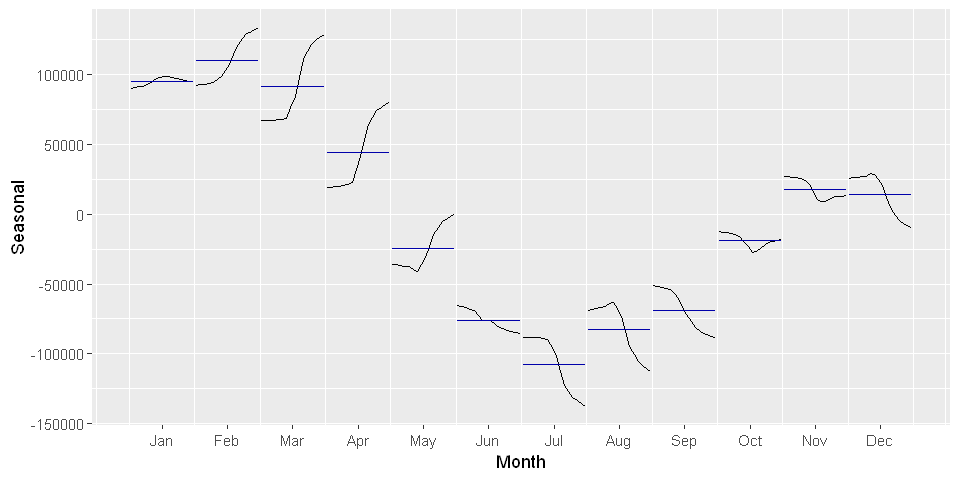

In [549]:
options(repr.plot.width=8, repr.plot.height=4)
STL_unemployment_components %>% seasonal() %>% ggsubseriesplot() + ylab("Seasonal")

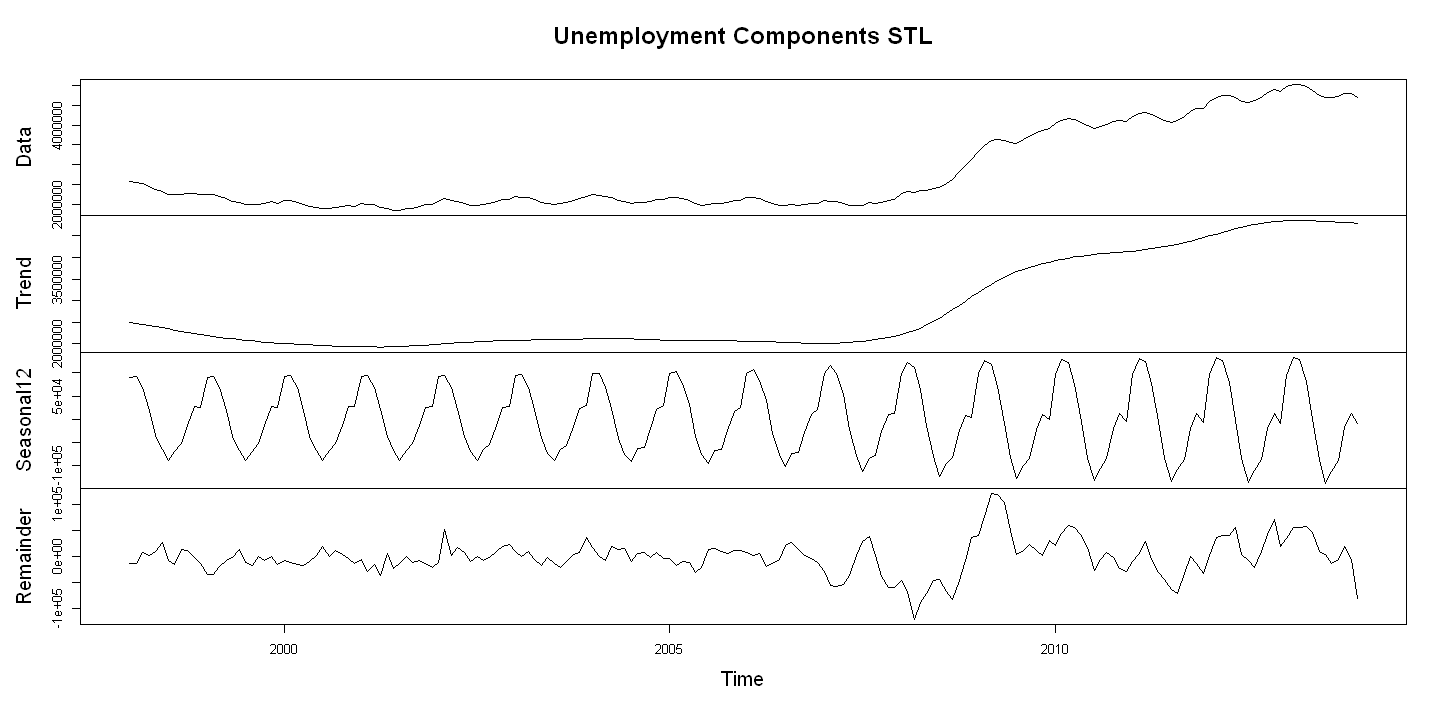

In [550]:
options(repr.plot.width=12, repr.plot.height=6)
plot(STL_unemployment_components, main = 'Unemployment Components STL')

Here we can see a more smothed trend. But the most interesting thing that we can observe is that the seasonality component varies with time. In the original time series the largest seasonal factor was for June until 2010, after 2010 it changes and July turns into the largest seasonal factor. The lowest is always for November.

The seasonal component might not be relevant to explain the dynamics of the series. In order to see that, we can compare the variance of each component with respect to the variance of the original series.

In [551]:
apply(STL_unemployment_components,2, var) / var(c(unemployment_series_train))

Data       Trend  Seasonal12   Remainder 
1.000000000 0.981421091 0.004820707 0.001000802

*We can see that it is the trend what explains most of the variance in the data.*

In [552]:
seasadj(STL_unemployment_components)

         Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep
1998 2486920 2460881 2456719 2423714 2405742 2397598 2338610 2303999 2307655
1999 2160988 2140263 2134939 2125002 2113172 2112141 2069575 2049211 2054330
2000 1998786 1986542 1974785 1964302 1965598 1969811 1981278 1956116 1960283
2001 1925458 1899559 1913461 1890474 1935462 1910502 1924184 1945291 1942137
2002 1982267 2055576 2015476 2039750 2040678 2032081 2050150 2049802 2060515
2003 2090332 2083665 2095383 2082926 2074933 2092857 2084682 2080618 2096138
2004 2135253 2120231 2112759 2139620 2131779 2130362 2103961 2112538 2110864
2005 2078345 2062320 2068323 2063884 2043532 2051088 2085217 2086911 2079048
2006 2072466 2062245 2064330 2034418 2035851 2036209 2057217 2056929 2038063
2007 1983560 1960519 1961696 1970375 1996022 2044660 2082954 2112510 2094298
2008 2163771 2193374 2190008 2274437 2367808 2471351 2549540 2624656 2706674
2009 3230155 3355881 3488662 3575508 3629836 3647098 3671115 3729324 3792915

Seasadj function returns seasonally adjusted data constructed by removing the seasonal component. The seasonally adjusted time series now just contains the trend and the irregular component.

##### *Forecasting with Decomposition*

While decomposition is primarily useful for studying time series data, and exploring historical changes over time, it can also be used in forecasting.

We will use stlf function which decompose the time series using STL, forecast the seasonally adjusted series with arima, and return the reseasonalised forecasts.

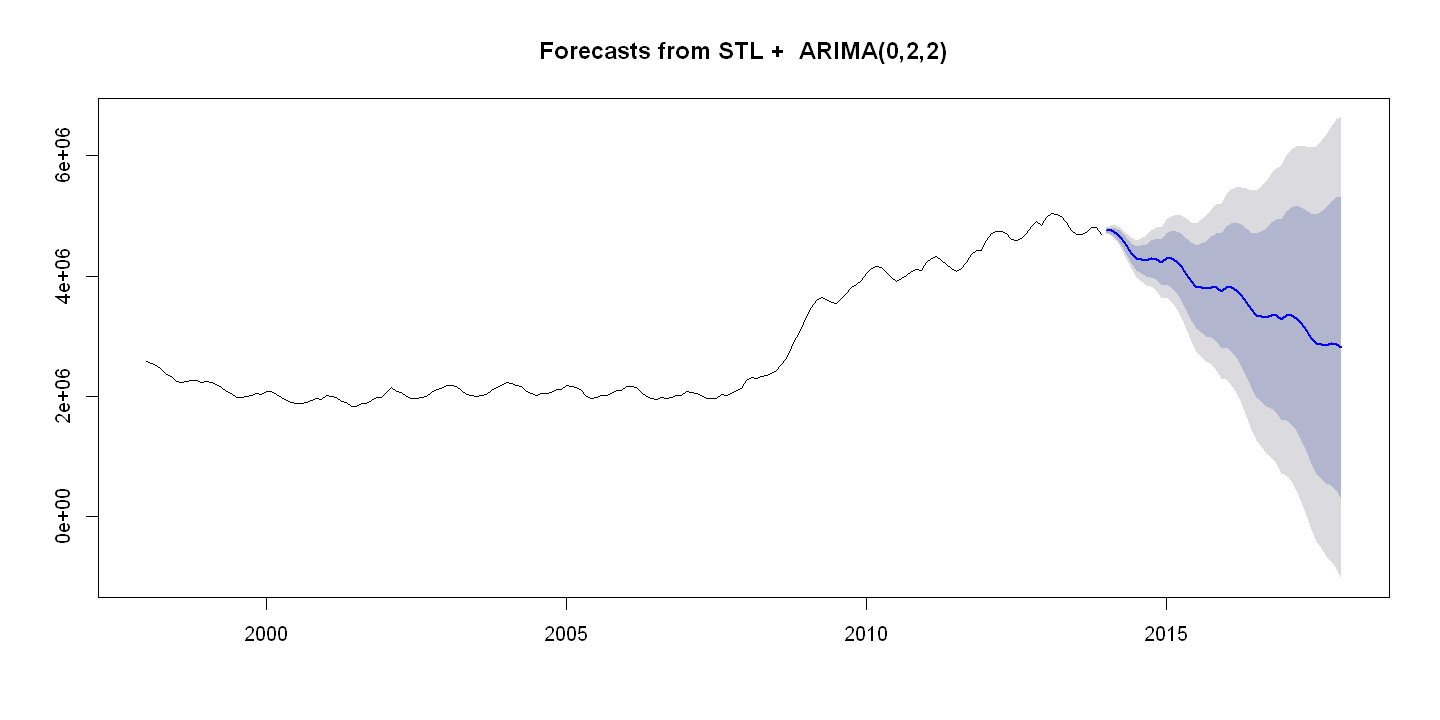

In [553]:
forecast_decomposed_unemployment_series <- stlf(unemployment_series_train, method='arima', h = 48)
plot(forecast_decomposed_unemployment_series)

- Evaluating the forecasts

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-237.377,24879.43,19067.31,0.02890272,0.7259244,0.07881806,-0.00131463,NA
Test set,305160.613,338260.77,305160.61,7.97975919,7.9797592,1.26143442,0.90775605,5.283993


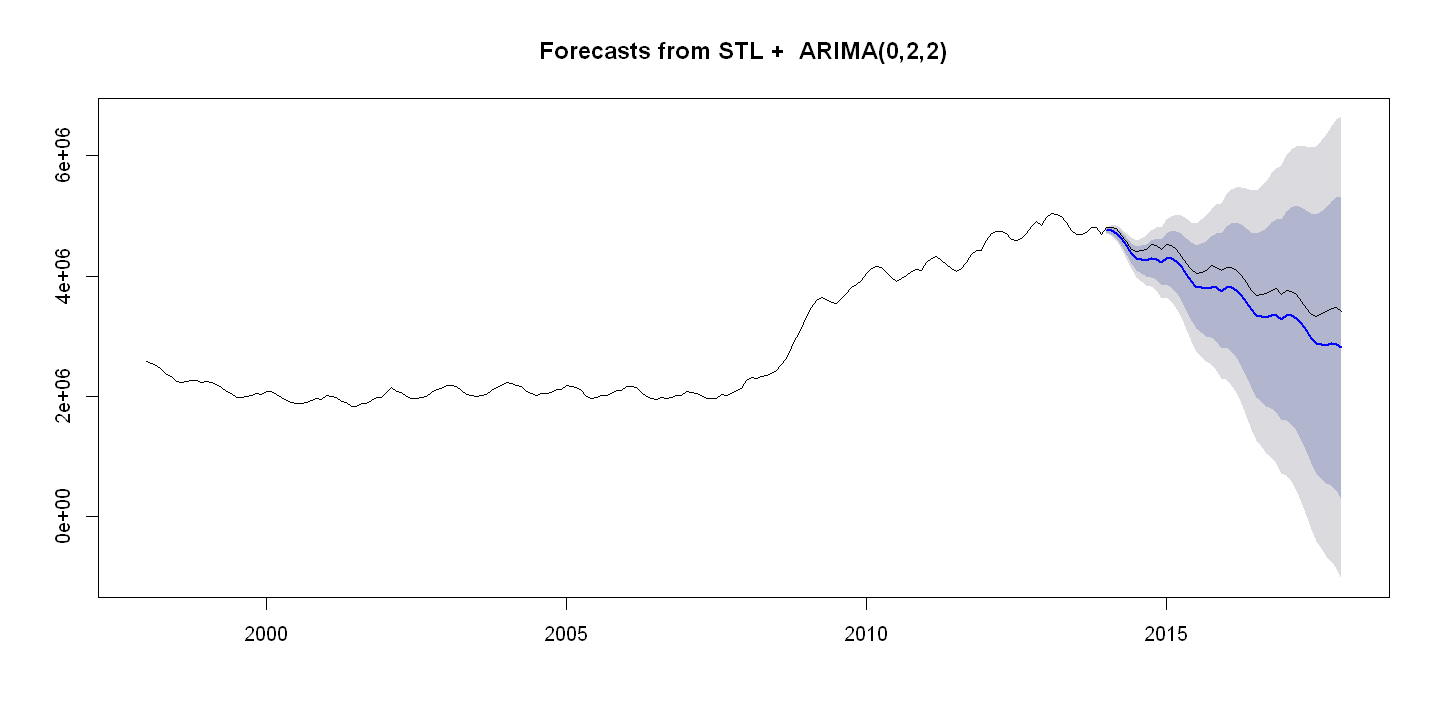

In [554]:
#Accuracy and plot
accuracy(forecast_decomposed_unemployment_series, unemployment_series_test)
plot(forecast_decomposed_unemployment_series)
lines(unemployment_1998_2017)

##### Forecasting with Holt-Winters Exponential Smoothing

We are not sure if our series behave in a multiplicative way so we will use its logarithmic transformation to convert it into an additive and that can be used in this model.

In [555]:
unemployment_series_log <-  log(unemployment_series_train)

In [556]:
unemployment_series_hw_forecasts  <- HoltWinters(unemployment_series_log)
unemployment_series_hw_forecasts

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = unemployment_series_log)

Smoothing parameters:
 alpha: 0.9723862
 beta : 0.2511722
 gamma: 1

Coefficients:
            [,1]
a   15.352014770
b   -0.008774350
s1   0.030985160
s2   0.030811953
s3   0.023844489
s4   0.007869203
s5  -0.015051176
s6  -0.025022205
s7  -0.035933154
s8  -0.030812052
s9  -0.017933890
s10  0.003680888
s11  0.016405506
s12  0.011342937

The estimated values of alpha, beta and gamma are 0.97, 0.25 and 1, respectively. The value of alpha (0.97)
is high, indicating that the estimate of the level at the current time point is based upon both recent
observations and some observations in the more distant past. The value of beta is 0.25, indicating that the estimate
of the slope b of the trend component remains roughly the same. The value of gamma (1) is very high, indicating that the seasonal change to much over time.


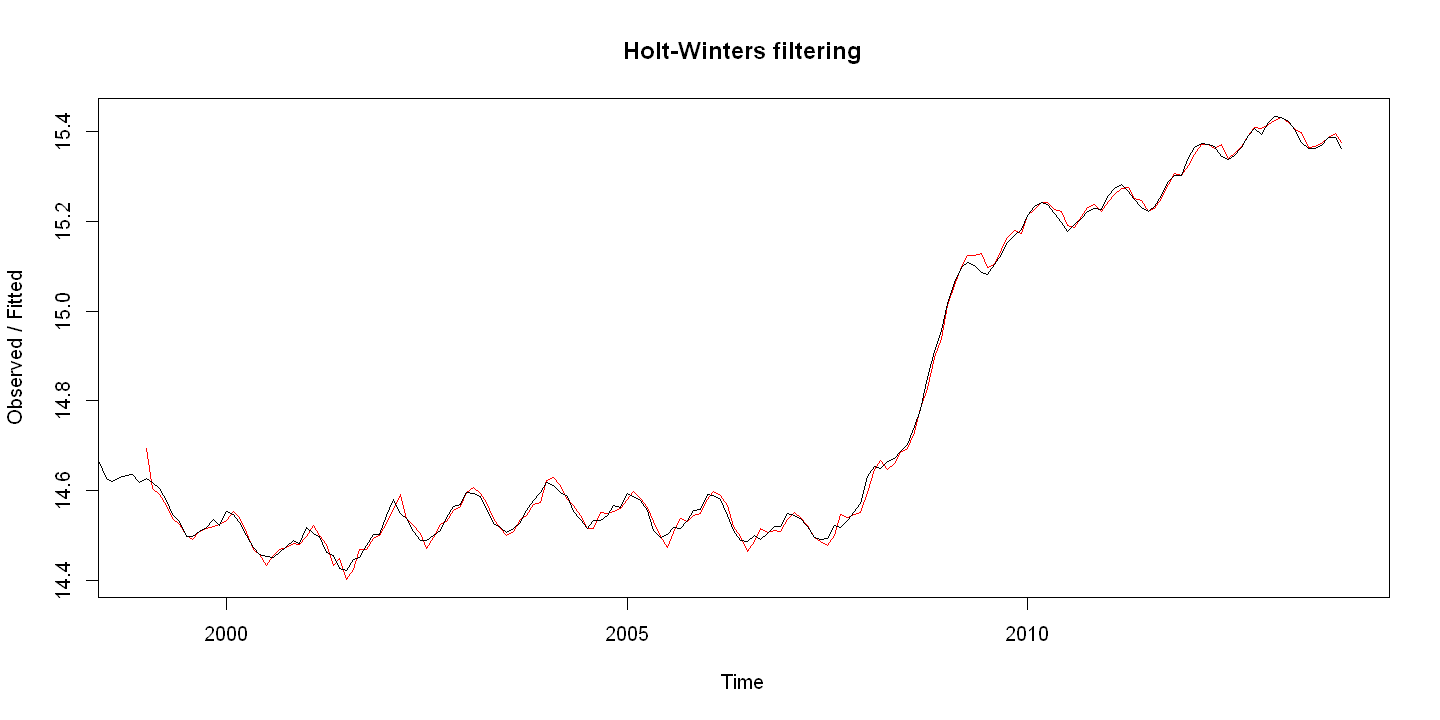

In [557]:
plot(unemployment_series_hw_forecasts)

The observed values are plotted with the black line and the fitted values with the red one.

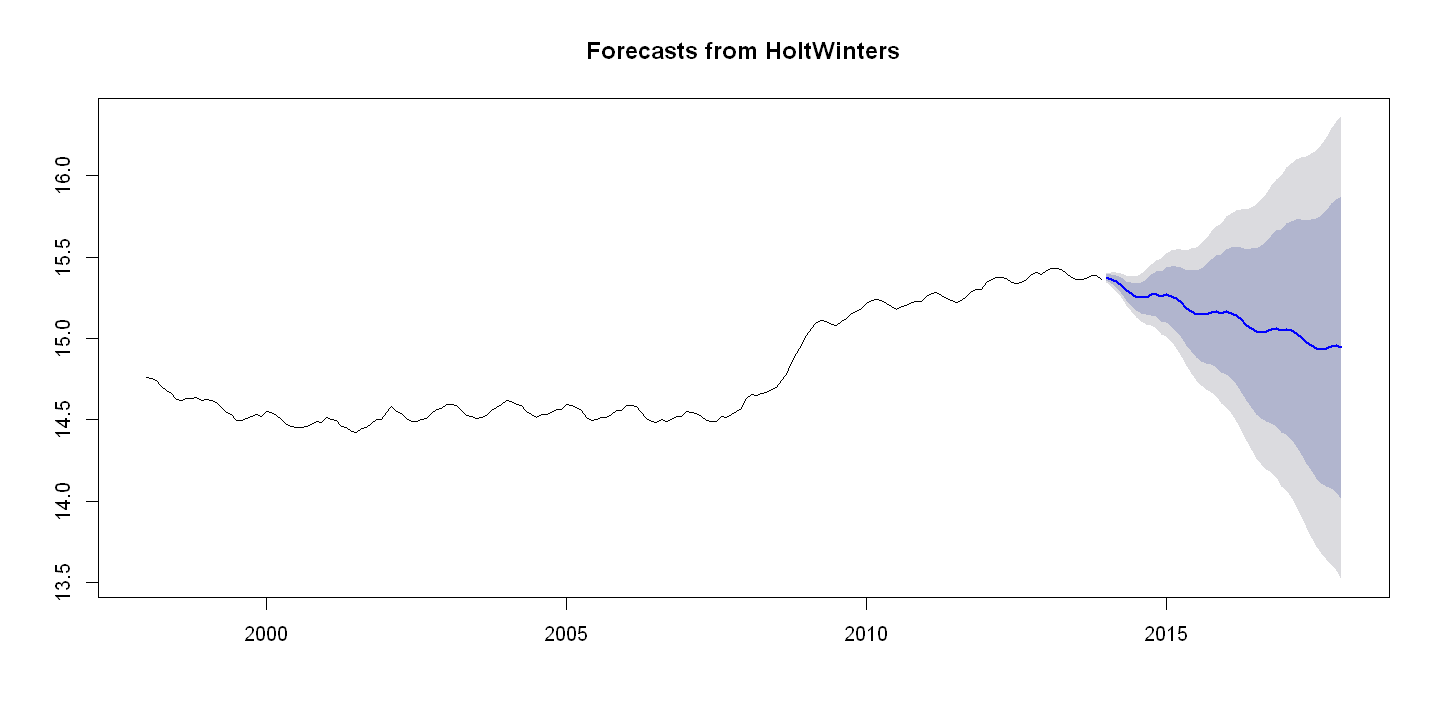

In [558]:
unemployment_series_hw_future_forecasts <- forecast(unemployment_series_hw_forecasts, h = 48)
plot(unemployment_series_hw_future_forecasts)

*The forecasts are shown as a blue line, and the blue and grey shaded areas show 80% and 95% prediction
intervals, respectively.*

We can investigate whether the predictive model can be improved upon by checking whether the in-sample forecast
errors show non-zero autocorrelations at lags 1-12, by making a correlogram and carrying out the Ljung-Box test.

What is desired in time series is to build a model such that after extracting the trend and seasonality it can be certain that the waste is very similar to a white Gaussian noise. This assures us that we obtained all possible information from the data and that we can no longer know much more about the series in the errors. This also allows us to trust that the model is good and that its predictions therefore must be good.

,m,Qm,pvalue
,1,1.94,1.641106e-01
,2,2.54,2.813260e-01
,3,2.68,4.434226e-01
,4,3.78,4.363974e-01
,5,3.78,5.811801e-01
,6,8.61,1.970183e-01
,7,10.15,1.804480e-01
,8,13.03,1.109511e-01
,9,13.26,1.513976e-01
,10,18.41,4.837849e-02


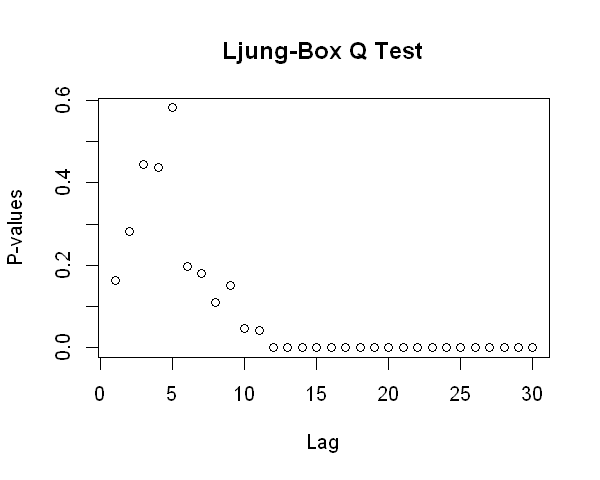

In [559]:
options(repr.plot.width=5, repr.plot.height=4)

#Ljung-Box test
unemployment_series_hw_future_forecasts_residuals  <- na.remove(residuals(unemployment_series_hw_future_forecasts))
LjungBoxTest(unemployment_series_hw_future_forecasts_residuals)
plot(LjungBoxTest(unemployment_series_hw_future_forecasts_residuals)[,3],main= "Ljung-Box Q Test", ylab= "P-values", xlab= "Lag")

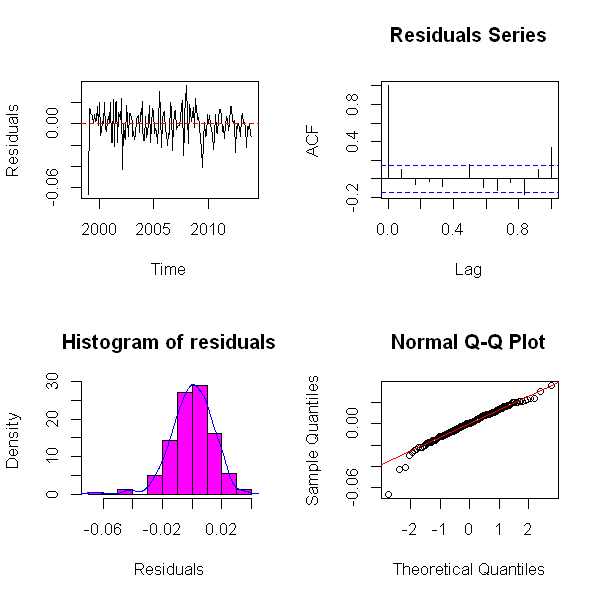

In [560]:
options(repr.plot.width=5, repr.plot.height=5)

#Graphic analysis
par (mfrow = c(2,2))
plot (unemployment_series_hw_future_forecasts_residuals, ylab = 'Residuals')
abline (h=0, lty=2, col="2")
##Correlogram
acf (unemployment_series_hw_future_forecasts_residuals, 12, na.action = na.pass, main = 'Residuals Series', ylab = 'ACF' )
##Histogram
hist(unemployment_series_hw_future_forecasts_residuals, prob = T, col="6", main = 'Histogram of residuals', xlab = 'Residuals')
lines(density (na.omit(unemployment_series_hw_future_forecasts_residuals)), col="4")
##Q-Q plot
qqnorm (unemployment_series_hw_future_forecasts_residuals)
qqline (unemployment_series_hw_future_forecasts_residuals,col="2")

The p-value of Ljung-Box test shows that we can reject the null hypothesis. So we can assume that your values are showing dependence on each other with 95% of confidence.

Therefore, there is evidence of autocorrelation for forecast errors, although forecast errors appear to be normally distributed with zero mean and constant variance over time. This suggests that the exponential adjustment of Holt-Winters does not provide an adequate predictive model. In addition, the assumptions on which the prediction intervals were based they probably aren't valid.

If we want to apply other models like Arima we have to have in mind that most of the time series models work on the assumption that the time series is stationary.  Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

### 3.2. Stationarity Testing

To test these conditions of the Unemployment series we will use the same methods that we used in the Suicide time series section.

#### 3.2.1. Moving statistics

We can plot the moving average and see if it varies with time, this is a smoothing method. By moving average We mean that at any instant ‘t’, we’ll take the average of the last year (in our case). We are going to plot it against the original time series and take a look at it.

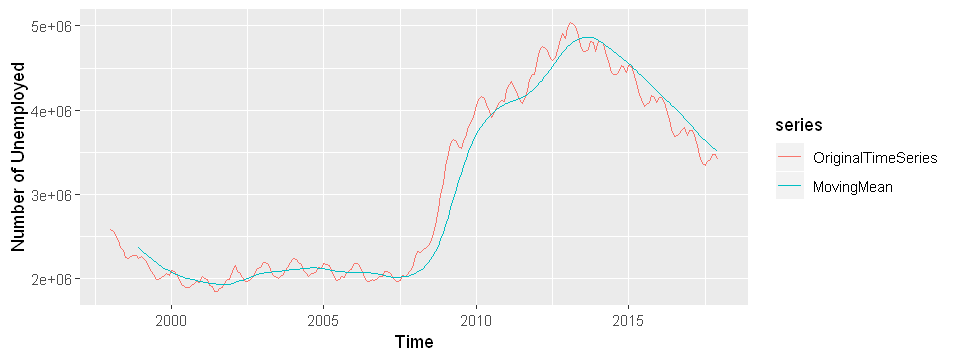

In [561]:
moving_mean_vs_OG(unemployment_1998_2017, 'Number of Unemployed')

The mean is clearly non constant over time. It seems that the series is **non stationary** but we are going to keep checking.

#### 3.2.2. Summary Statistics

As we did with the Suicide time series we are going to split Unemployment time series into two partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.

In [562]:
Stationarity_descriptive_test (unemployment_1998_2017)

[1] "Mean of the first partition = 2074668.23841667"
[1] "Mean of the second partition = 4009564.52066116"
[1] "Variance of the first partition = 18045819644.7617"
[1] "Variance of the second partition = 474870785999.852"


Running the code above, we can see the mean and variance look very different over time. It seems that we have a **non-stationary** time series.

#### 3.2.3. Statistical Tests

In [563]:
Stationarity_statistical_tests(unemployment_1998_2017)


	Augmented Dickey-Fuller Test

data:  timeseries
Dickey-Fuller = -0.62491, Lag order = 6, p-value = 0.9756
alternative hypothesis: stationary



Warning message in kpss.test(timeseries):
"p-value smaller than printed p-value"


	KPSS Test for Level Stationarity

data:  timeseries
KPSS Level = 3.7955, Truncation lag parameter = 4, p-value = 0.01



According to the test our Unemployment time series it's clearly **non stationary**.

## 4. Forecasting with ARIMA

### 4.1.  Conversion to Stationary

#### 4.1.1  Smoothing

We are going to keep working with the Box Cox transformated series.

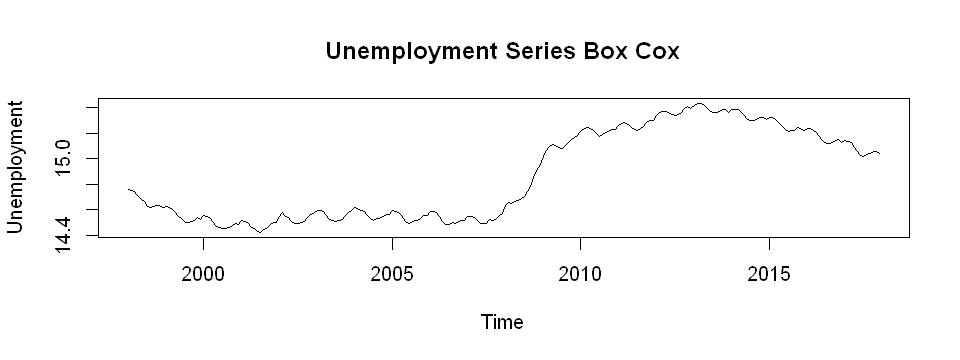

In [564]:
options(repr.plot.width=8, repr.plot.height=3)

unemployment_series_BoxCox  <- BoxCox(unemployment_1998_2017, lambda = 0)
plot(unemployment_series_BoxCox, ylab = 'Unemployment', main = 'Unemployment Series Box Cox')

#### 4.1.2. Differencing
Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

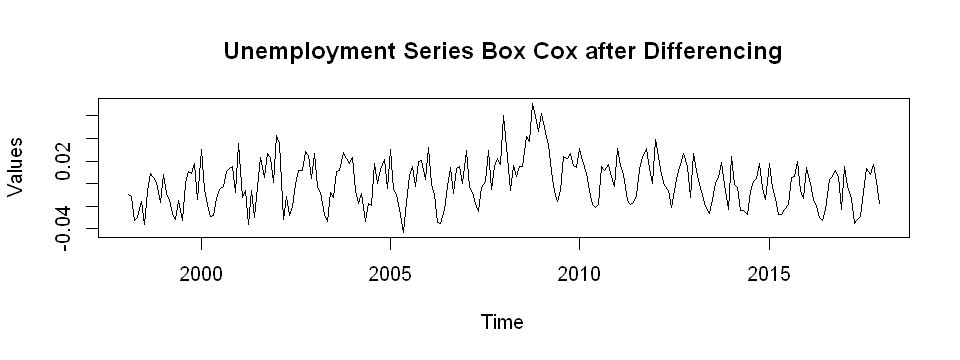

In [565]:
unemployment_series_diff_BoxCox <- diff(unemployment_series_BoxCox)

options(repr.plot.width=8, repr.plot.height=3)
plot(unemployment_series_diff_BoxCox, ylab = 'Values', main = 'Unemployment Series Box Cox after Differencing')

Now we are going to test the resulting series **after the transformation.**
We are going to use the sationarity tests that we did before.

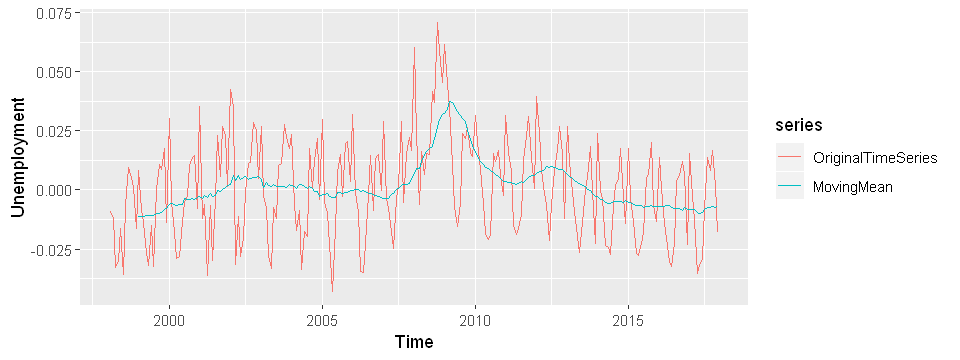

In [566]:
#Visual test with moving mean
moving_mean_vs_OG(unemployment_series_diff_BoxCox, 'Unemployment')

The mean doesn't keep constant over time. But it's pretty much stabilized than the original. 

In [567]:
#Numerical test contrasting mean and variance at different time points
Stationarity_descriptive_test(unemployment_series_diff_BoxCox)

[1] "Mean of the first partition = -0.00160327747958431"
[1] "Mean of the second partition = 0.00421737983930603"
[1] "Variance of the first partition = 0.00038817693668656"
[1] "Variance of the second partition = 0.00047045485779636"


Both mean and variance don't change almost anything over time because of the transformation.

In [568]:
#KPSS and ADF hypothesis tests for stationarity
Stationarity_statistical_tests(unemployment_series_diff_BoxCox)

Warning message in adf.test(timeseries):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  timeseries
Dickey-Fuller = -5.6141, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(timeseries):
"p-value greater than printed p-value"


	KPSS Test for Level Stationarity

data:  timeseries
KPSS Level = 0.32641, Truncation lag parameter = 4, p-value = 0.1



Our new time series passed both tests with 1 difference. **We have a stationary series now**.

Also we can use 'ndiffs' function to see the number of differences required for our time series to pass the stationarity statistical tests. We are going to check this out for the 'kpss', 'adf' and 'pp' tests.

In [569]:
ndiffs(unemployment_1998_2017, test= 'kpss')

[1] 1

In [570]:
ndiffs(unemployment_1998_2017, test= 'adf')

[1] 1

In [571]:
ndiffs(unemployment_1998_2017, test='pp')

[1] 1

We have converted the data into stationary but we have seen that there is a seasonal component in our time series. We are going to take a look at the seasonal component to see if one order differencing is enough to get rid of it:

In [572]:
STL_unemployment_diff_BoxCox_components <- mstl(unemployment_series_diff_BoxCox)
seasonal(STL_unemployment_diff_BoxCox_components)

               Jan           Feb           Mar           Apr           May
1998                1.007698e-03 -1.192873e-02 -2.301697e-02 -2.619057e-02
1999  3.039738e-02  9.645888e-04 -1.202484e-02 -2.293702e-02 -2.650347e-02
2000  3.044996e-02  9.234567e-04 -1.211858e-02 -2.285430e-02 -2.681292e-02
2001  3.050911e-02  8.761629e-04 -1.232576e-02 -2.276228e-02 -2.724404e-02
2002  3.073233e-02  8.104291e-04 -1.254808e-02 -2.268210e-02 -2.768113e-02
2003  3.099979e-02  9.242556e-04 -1.329360e-02 -2.236461e-02 -2.895028e-02
2004  3.114838e-02  9.920971e-04 -1.409894e-02 -2.212077e-02 -3.030982e-02
2005  3.114002e-02  1.329473e-03 -1.286127e-02 -2.067698e-02 -3.074755e-02
2006  3.092994e-02  1.856157e-03 -1.145678e-02 -1.908886e-02 -3.107658e-02
2007  3.060097e-02  3.386974e-03 -9.118110e-03 -1.823811e-02 -2.955964e-02
2008  3.052764e-02  5.035572e-03 -6.665742e-03 -1.727774e-02 -2.794522e-02
2009  3.041595e-02  6.935389e-03 -5.128385e-03 -1.611004e-02 -2.580686e-02
2010  2.949277e-02  8.823

First order differencing seems enough to get what we need. The values are close to zero and have clearly changed since the original series seasonal component.

### 4.2. Best ARIMA model

We already have the data that meet the conditions Arima asks us for. With this data we would pass on to calculate the appropriate parameters (p, d, q and P, D, Q) to choose the model that best fits with the values of acf and pcf function applied to our transformated and differenced time series.

However, we have chosen to use the 'auto.arima' function that facilitates our work choosing the best parameters.

The 'auto.arima' function returns the best ARIMA model according to either AIC, AICc or BIC value. The function conducts a search over possible model within the order constraints provided.

#### 4.2.1. Estimating

Throughout the analysis we have arrived at a series of conclusions that we are going to include in the model parameters:

- We know that our original time series is non stationary.
- We know that our original time series has a seasonal component.
- We know that our series works better with a transformation; lambda = 0 will perform a BoxCox transformation.
- Also, we know that we only need a differencing of first order to make the data stationary (d=1)so we will be more efficient and we will introduce the parameter d in the function.

In [573]:
unemployment_series_best_arima <- auto.arima(unemployment_1998_2017, 
                                             d = 1, trace = TRUE, stationary = FALSE,
                                             seasonal = TRUE, lambda = 0)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2)(1,1,1)[12]                    : -1314.466
 ARIMA(0,1,0)(0,1,0)[12]                    : -1180.274
 ARIMA(1,1,0)(1,1,0)[12]                    : -1247.204
 ARIMA(0,1,1)(0,1,1)[12]                    : -1242.891
 ARIMA(2,1,2)(0,1,1)[12]                    : -1316.928
 ARIMA(2,1,2)(0,1,0)[12]                    : -1271.066
 ARIMA(2,1,2)(0,1,2)[12]                    : -1316.021
 ARIMA(2,1,2)(1,1,2)[12]                    : -1312.901
 ARIMA(1,1,2)(0,1,1)[12]                    : -1319.247
 ARIMA(1,1,1)(0,1,1)[12]                    : -1320.316
 ARIMA(0,1,0)(0,1,1)[12]                    : -1204.448
 ARIMA(1,1,1)(1,1,1)[12]                    : -1317.394
 ARIMA(1,1,1)(0,1,0)[12]                    : -1256.461
 ARIMA(1,1,1)(0,1,2)[12]                    : -1319.407
 ARIMA(1,1,1)(1,1,2)[12]                    : -1315.731
 ARIMA(2,1,1)(0,1,1)[12]                    : -1318.841
 ARIMA(1,1,0)(0,1,1)[12]                   

The arima model that best fits is this: ARIMA(1,1,1)(0,1,1)[12]

To check if it is valid we will observe how its residuals behave as we did in the Holt-Winters model.

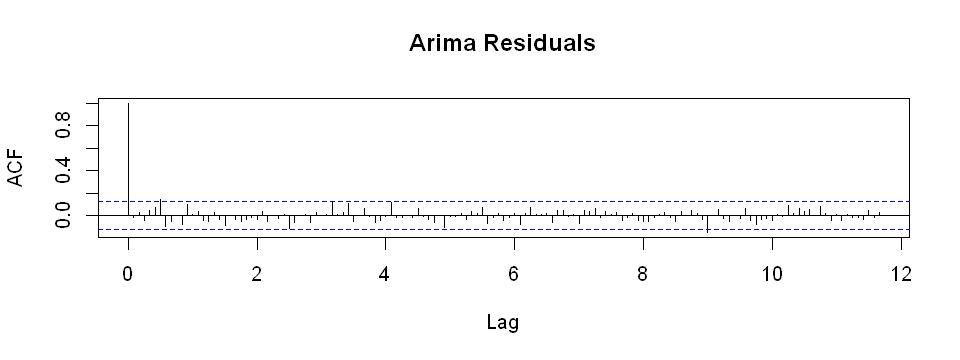

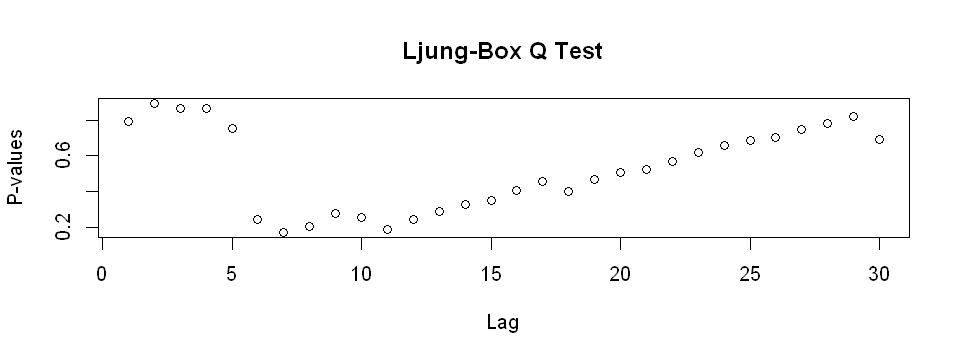

In [574]:
#Autocorrelation
unemployment_series_best_arima_residuals  <- residuals(unemployment_series_best_arima)
acf(unemployment_series_best_arima_residuals, main = 'Arima Residuals', lag.max = 140)
box_test_unemployment_series_best_arima <- LjungBoxTest (unemployment_series_best_arima_residuals)
plot(box_test_unemployment_series_best_arima[,3],main= "Ljung-Box Q Test", ylab= "P-values", xlab= "Lag")

In [575]:
box_test_unemployment_series_best_arima

,m,Qm,pvalue
,1,0.07,0.7938140
,2,0.22,0.8949671
,3,0.74,0.8645344
,4,1.26,0.8674812
,5,2.65,0.7540503
,6,7.96,0.2407405
,7,10.35,0.1693534
,8,10.96,0.2038301
,9,10.96,0.2782812
,10,12.50,0.2531187


*The ACF of the residuals shows non-significant autocorrelations.*
*Also, all the values of p for the Ljung-Box Q test are above 0.05, which indicates that the data is not dependent.*

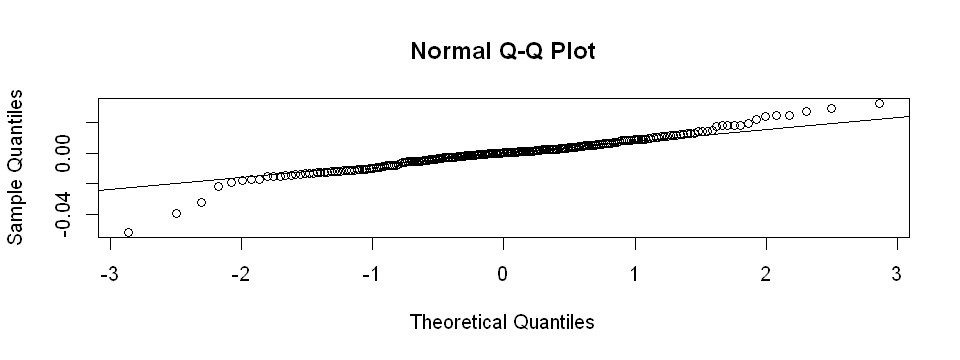

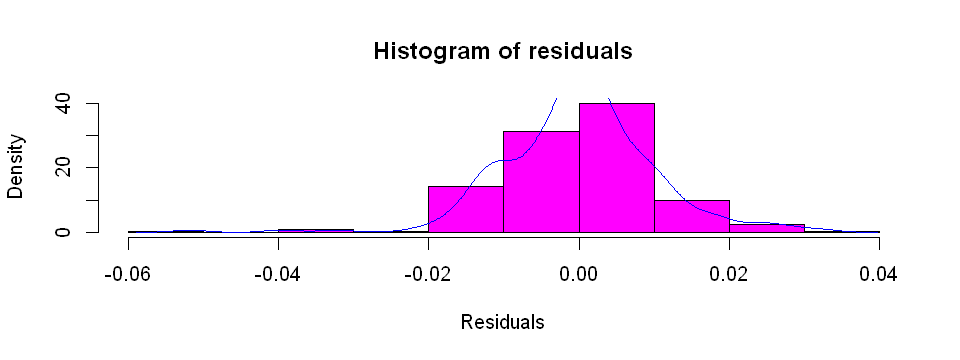

In [576]:
#Normal Q-Q plot
qqnorm(unemployment_series_best_arima_residuals)
qqline(unemployment_series_best_arima_residuals)

#Histogram
hist(unemployment_series_best_arima_residuals, prob = T, col="6", main = 'Histogram of residuals', xlab = 'Residuals')
lines(density (na.omit(unemployment_series_best_arima_residuals)), col="4")



*The values are close to normal.*

As the graphs support the assumption that there is no pattern in the residuals, we can go ahead and calculate the forecast.

#### 4.2.2  Forecasting

The following is the plot of the next two years forectasts (blue line). The shadowed blue is the 80% of confidence and the shadowed grey is the 95%.

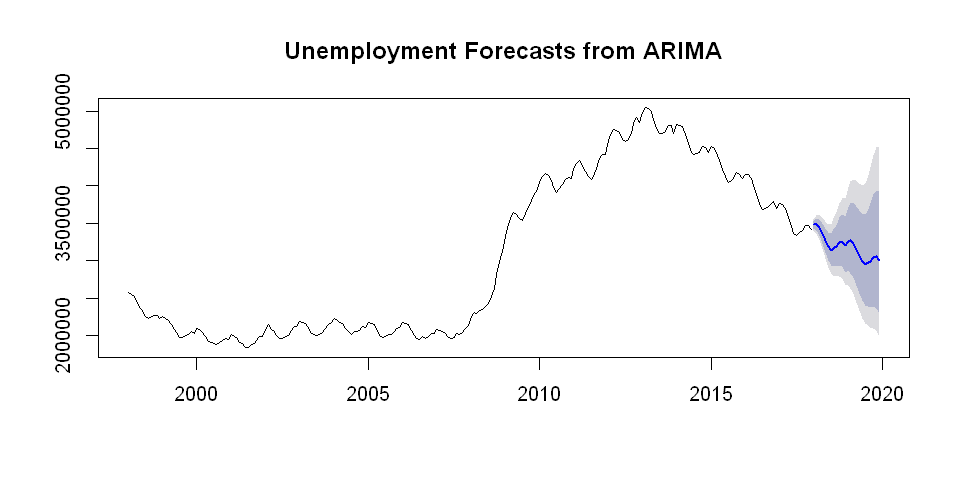

In [577]:
options(repr.plot.width=8, repr.plot.height=4)
unemployment_series_best_arima_forecast <- forecast(unemployment_series_best_arima)
plot(unemployment_series_best_arima_forecast, main= 'Unemployment Forecasts from ARIMA')

In [578]:
unemployment_series_best_arima_forecast

         Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
Jan 2018        3478558 3431554 3526205 3406930 3551692
Feb 2018        3483087 3406358 3561545 3366426 3603791
Mar 2018        3449172 3344144 3557498 3289846 3616213
Apr 2018        3365110 3233823 3501727 3166410 3576279
May 2018        3273154 3116888 3437254 3037209 3527429
Jun 2018        3184333 3004081 3375400 2912829 3481144
Jul 2018        3140472 2934551 3360843 2831067 3483692
Aug 2018        3163932 2927911 3418979 2810182 3562212
Sep 2018        3186760 2920174 3477684 2788201 3642291
Oct 2018        3241707 2941162 3572963 2793512 3761810
Nov 2018        3250023 2919350 3618151 2758147 3829617
Dec 2018        3198128 2843994 3596358 2672689 3826866
Jan 2019        3260794 2865804 3710225 2676463 3972698
Feb 2019        3266011 2835947 3761293 2631707 4053197
Mar 2019        3235118 2774770 3771839 2558219 4091122
Apr 2019        3157111 2674287 3727105 2449346 4069392
May 2019        3071608 2569277 3672153 2337523 

- Evaluating forecasts


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2)(1,1,1)[12]                    : -1147.128
 ARIMA(0,1,0)(0,1,0)[12]                    : -1027.28
 ARIMA(1,1,0)(1,1,0)[12]                    : -1088.309
 ARIMA(0,1,1)(0,1,1)[12]                    : -1084.348
 ARIMA(2,1,2)(0,1,1)[12]                    : -1150.361
 ARIMA(2,1,2)(0,1,0)[12]                    : -1112.564
 ARIMA(2,1,2)(0,1,2)[12]                    : -1149.432
 ARIMA(2,1,2)(1,1,2)[12]                    : -1145.425
 ARIMA(1,1,2)(0,1,1)[12]                    : -1153.049
 ARIMA(1,1,1)(0,1,1)[12]                    : -1154.034
 ARIMA(0,1,0)(0,1,1)[12]                    : -1048.468
 ARIMA(1,1,1)(1,1,1)[12]                    : -1150.189
 ARIMA(1,1,1)(0,1,0)[12]                    : -1098.221
 ARIMA(1,1,1)(0,1,2)[12]                    : -1153.072
 ARIMA(1,1,1)(1,1,2)[12]                    : -1148.459
 ARIMA(2,1,1)(0,1,1)[12]                    : -1152.539
 ARIMA(1,1,0)(0,1,1)[12]                    

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-1482.438,29702.52,21547.36,-0.00397718,0.7619887,0.08635393,0.1014751,NA
Test set,-167422.395,186596.63,167422.39,-4.69058925,4.6905892,0.67096779,0.8883942,2.856588


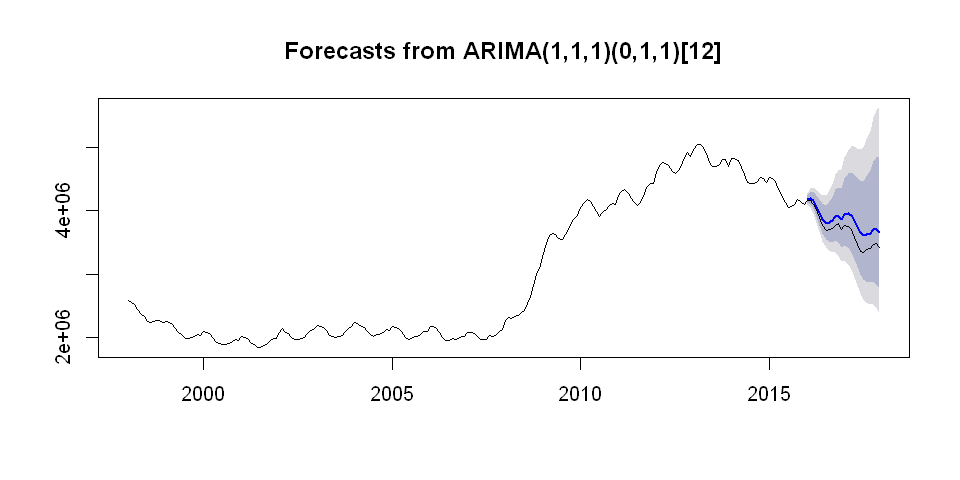

In [579]:
#Split train and test
forecast_arima_unemployment_series_train <- forecast(auto.arima(head(unemployment_1998_2017, 216), 
                                             d = 1, trace = TRUE, stationary = FALSE,
                                             seasonal = TRUE, lambda = 0), h = 24)

#Accuracy and plot
accuracy(forecast_arima_unemployment_series_train, unemployment_series_test)
plot(forecast_arima_unemployment_series_train)
lines(unemployment_1998_2017)

#### *Comparison of predictive models carried out throughout the project on unemployment in Spain.*

In [580]:
accuracy (forecast_decomposed_unemployment_series_future, unemployment_series_test)
accuracy (forecast_arima_unemployment_series_train, unemployment_series_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-237.377,24879.43,19067.31,0.02890272,0.7259244,0.07881806,-0.00131463,NA
Test set,305160.613,338260.77,305160.61,7.97975919,7.9797592,1.26143442,0.90775605,5.283993


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-1482.438,29702.52,21547.36,-0.00397718,0.7619887,0.08635393,0.1014751,NA
Test set,-167422.395,186596.63,167422.39,-4.69058925,4.6905892,0.67096779,0.8883942,2.856588


None of the models offer us a good result, it is likely that we have to face the unemployment time series with other methods.

That the numbers are so big and that they are not distributed in a normal way is not a great help either, even when they are transformed, they still give very dispersed results.

Like suicide, unemployment is a stochastic process that has undergone many changes in Spain in recent years, difficult to predict with the information we had.

We will have to study models that give more weight to the most recent values, non-parametric methods or, simply, procedures where which we have more variables than a univariate time series.

# Relation between Unemployment and Suicide in Spain

In this section, we are going to analyze the statistical relationship of the time series of Suicide and Unemployment in Spain (1998-2017).


For this we are going to use the proposals of Box and Jenkins (1970) for the calculation of the cross-correlation function and the subsequent identification of the potential transfer between two systems (two time series).


In this approach the relationship between two time series is studied; relationship that does not pretend to be explanatory, but informs us about the strength and direction of the possible impact of a series 'input' to another series 'output'.

The point of this methodology and not calculate the cross correlation between the original time series is that when an input series is autocorrelated, the direct cross-correlation function between the input and response series gives a misleading indication of the relation between the input and response series.

Is usually called prewhitening. You first fit an ARIMA model for the input series sufficient to reduce the residuals to white noise; then, filter the input series with this model to get the white noise residual series. You then filter the output series with the same model and cross-correlate the filtered response with the filtered input series.

## 1. Prewhitening Method and Cross Correlation

## 1.1. Input series Arima

The model must be valid and return residuals that behave like a white noise.

In [581]:
#We can take the model that we have calculated in the Unemployment series section
unemployment_series_best_arima

Series: unemployment_1998_2017 
ARIMA(1,1,1)(0,1,1)[12] 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1      ma1     sma1
      0.9447  -0.6481  -0.6937
s.e.  0.0271   0.0561   0.0720

sigma^2 estimated as 0.0001127:  log likelihood=720.88
AIC=-1433.76   AICc=-1433.58   BIC=-1420.06

In [582]:
#As we saw before, the residuals of this model pass the Lunj Box test and don't have autocorrelation between them
LjungBoxTest(unemployment_series_best_arima_residuals)

,m,Qm,pvalue
,1,0.07,0.7938140
,2,0.22,0.8949671
,3,0.74,0.8645344
,4,1.26,0.8674812
,5,2.65,0.7540503
,6,7.96,0.2407405
,7,10.35,0.1693534
,8,10.96,0.2038301
,9,10.96,0.2782812
,10,12.50,0.2531187


## 1.2. Filtering the output series
Pre-whiten the output series by applying the model of the input series to the output series. The same parameters must serve to make both models valid.



In [583]:
#Applying the model
prewhitening_filtered_suicide_series <-  arima(suicide_1998_2017,
                                               order = c(1,1,1), 
                                               seasonal = list(order = c(0,1,1), period = 12))

In [584]:
#Checking the residuals
prewhitening_filtered_suicide_series_residuals <- residuals(prewhitening_filtered_suicide_series)
LjungBoxTest(prewhitening_filtered_suicide_series_residuals)

,m,Qm,pvalue
,1,0.01,0.9160149
,2,0.02,0.9917069
,3,0.90,0.8248046
,4,1.30,0.8607666
,5,3.55,0.6159338
,6,4.04,0.6709002
,7,5.17,0.6394281
,8,6.97,0.5401642
,9,10.70,0.2969654
,10,11.12,0.3478845


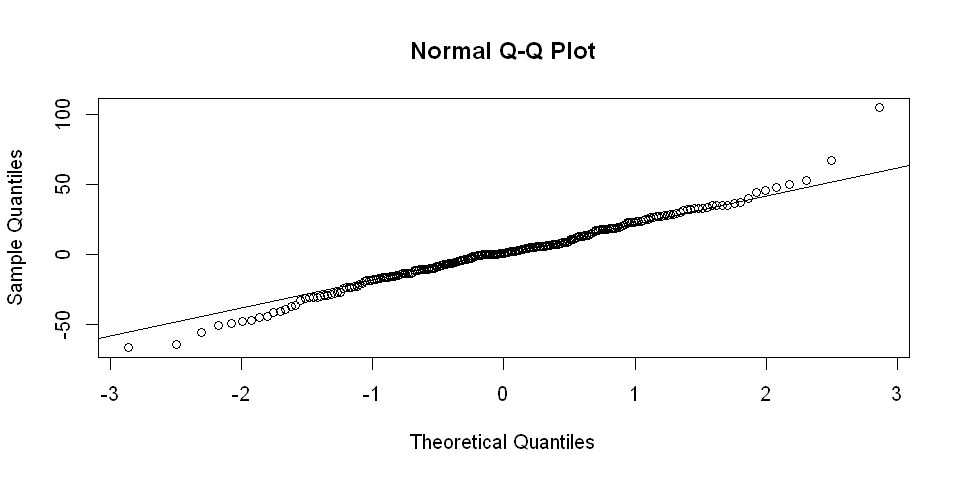

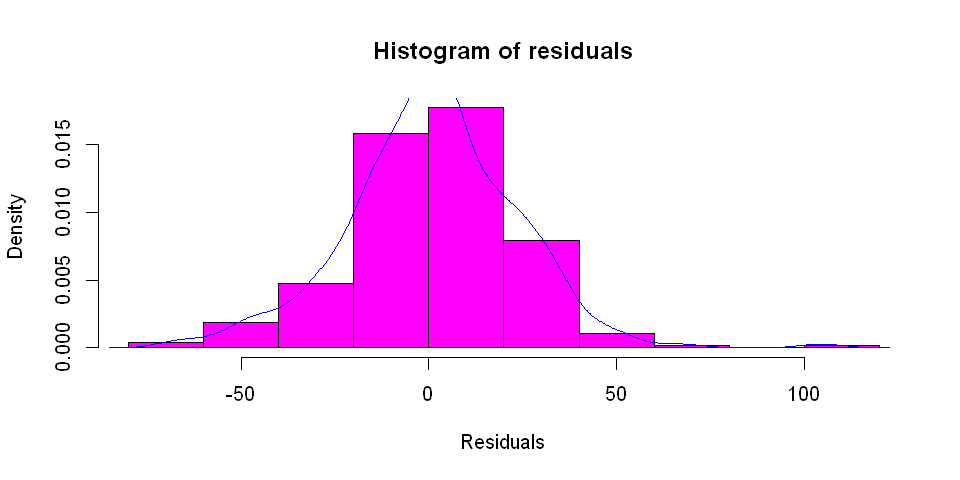

In [585]:
#Normal Q-Q plot
qqnorm(prewhitening_filtered_suicide_series_residuals)
qqline(prewhitening_filtered_suicide_series_residuals)

#Histogram
hist(prewhitening_filtered_suicide_series_residuals, prob = T, col="6", main = 'Histogram of residuals', xlab = 'Residuals')
lines(density (na.omit(prewhitening_filtered_suicide_series_residuals)), col="4")

They behave like white noise, we can go ahead and calculate the cross correlaion function.

## 1.3. Cross Correlation function
Calculate the cross-correlation function between the residuals of both models and diagnose the transfer.

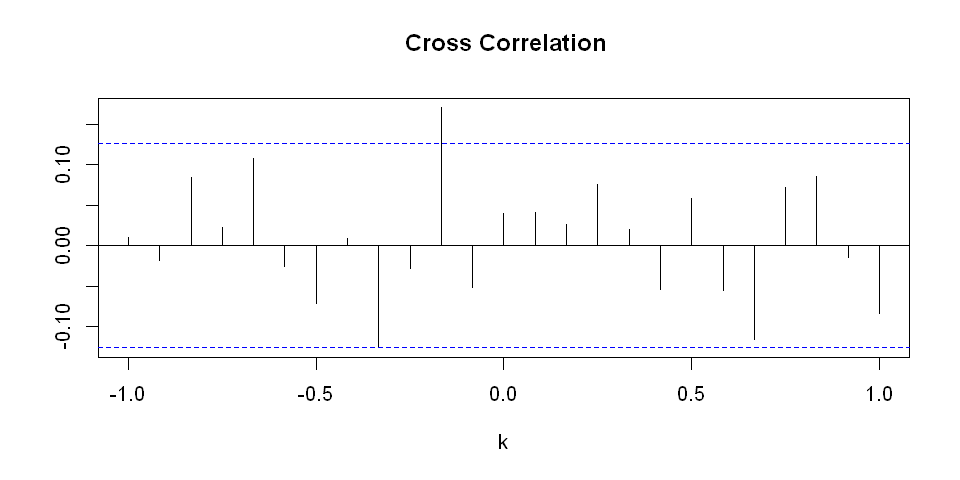

In [586]:
cross_correlation_after_prewhitening  <- ccf(unemployment_series_best_arima_residuals,
                                             prewhitening_filtered_suicide_series_residuals,
                                             lag = 12, xlab = 'k', ylab = '', main = ' Cross Correlation' )

In [587]:
cross_correlation_after_prewhitening


Autocorrelations of series 'X', by lag

-1.0000 -0.9167 -0.8333 -0.7500 -0.6667 -0.5833 -0.5000 -0.4167 -0.3333 -0.2500 
  0.010  -0.018   0.084   0.023   0.108  -0.025  -0.072   0.009  -0.125  -0.028 
-0.1667 -0.0833  0.0000  0.0833  0.1667  0.2500  0.3333  0.4167  0.5000  0.5833 
  0.170  -0.052   0.039   0.041   0.026   0.076   0.020  -0.055   0.058  -0.055 
 0.6667  0.7500  0.8333  0.9167  1.0000 
 -0.115   0.072   0.085  -0.015  -0.084 

#### *Diagnosis*

The cross correlation function measures not only the strength of the relationship, but also its direction. This last property is useful to identify causal variables. 

For this reason, it is important to examine the cross correlation function for both the positive values of k and for the negatives. For negative values of k, the cross correlation function describes the linear influence of the past values of Y(time) over X(time). For positive values of k, the cross correlation function indicates the linear influence of the past values of xt on yt.

Surprise!
In our case the cross correlation function shows a significant correlation in a negative value of k, so it could be said that there is an impact from one series to another but in the opposite direction to what we thought. Suicide 'would explain', in some aspect, unemployment in Spain.

A priori this does not make much sense, but it does lead us to other conclusions that bring us closer to understanding the phenomenon of suicide in Spain.